## Urban Data Analytics and Visualization

This code is prepared to study the urban data analytics and visualization by Elif Esra Aydin, Praveen Govindarajan, and F. Peter Ortner - Net Zero Futures Lab (NZFL) of Singapore University of Technology and Design.

This code is shared as a part of research paper published, namely "Urban Heat Island Mitigation with Generative Models: A Case Study of Urban Design Exploration for Singapore’s Tropical Climate." Authors: Elif Esra Aydin, F. Peter Ortner, Praveen Govindarajan, JingZhi Tay, Zebin Chen. 2024. Case Studies in the Environment.

Latest update: 27/01/2025

To regenerate the data visualizations, please follow the code steps one by one.

In [1]:
#Import the required libraries
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt

#Displays all the columns in the dataframe
pd.set_option('display.max_columns', None) 

Please update the following folder location to where you download dataset files (UHI_yr.csv, UHI_n.csv, UHI_d.csv)

- UHI_yr: mean Annual UHI
- UHI_n : mean Nighttime UHI
- UHI_d : mean Daytime UHI


- This study is focused on annual UHI (UHI_yr) dataset. You can test the other data files for comparison study activity.

In [2]:
# Reach to dataset by calling the file path
data = r'UHI_yr_NZFL.csv' 

#UHI_n data
#data = r'Sample_Datasets\UHI_n_NZFL.csv'

#UHI_d data
#data = r'Sample_Datasets\UHI_d_NZFL.csvv'


In [3]:
#Read the data from comma seperated file format
dataset = pd.read_csv(data)

In [4]:
#Check the dataset whether it is read successfully or not
dataset

sim_no    UHI_yr  asphalt_ratio  park_grass_ratio  parcel_grass_ratio  \
0          0  0.621130       0.134203          0.034899            0.770730   
1          1  0.616610       0.099550          0.000000            0.851438   
2          2  0.589817       0.044727          0.000000            0.919077   
3          3  0.578185       0.058153          0.000000            0.910829   
4          4  0.540000       0.048316          0.079221            0.853758   
...      ...       ...            ...               ...                 ...   
8995    8995  0.606895       0.220688          0.074712            0.359128   
8996    8996  0.681507       0.167458          0.078687            0.425741   
8997    8997  0.818916       0.123344          0.082933            0.367706   
8998    8998  0.833676       0.111386          0.088649            0.423824   
8999    8999  0.826370       0.092195          0.091245            0.446172   

      podium_grass_ratio      GnPR       TCR  greenroof_ratio       SCR  \
0               0.000000  0.805629  0.000000         0.000000  0.060168   
1               0.000000  0.851438  0.000000         0.000000  0.049013   
2               0.000000  0.919077  0.000000         0.000000  0.036195   
3               0.000000  0.910829  0.000000         0.000000  0.031024   
4               0.000000  0.932979  0.000000         0.000000  0.018705   
...                  ...       ...       ...              ...       ...   
8995            0.179710  0.613550  0.000000         0.135745  0.195781   
8996            0.141419  0.645847  0.055520         0.157678  0.215714   
8997            0.154247  0.604886  0.000000         0.235218  0.308322   
8998            0.124710  0.637183  0.042223         0.219515  0.283334   
8999            0.159645  0.697062  0.062531         0.182033  0.239453   

      parcel_fp_ratio  podium_fp_ratio     tower_GFA   podium_GFA  \
0            0.060168         0.000000  1.687300e+06       0.0000   
1            0.049013         0.000000  1.738400e+06       0.0000   
2            0.036195         0.000000  1.466900e+06       0.0000   
3            0.031024         0.000000  1.315800e+06       0.0000   
4            0.018705         0.000000  8.224942e+05       0.0000   
...               ...              ...           ...          ...   
8995         0.047662         0.030018  6.844328e+05  272961.0186   
8996         0.055555         0.029018  1.173700e+06  303099.4669   
8997         0.056037         0.036552  1.735100e+06  498613.6913   
8998         0.051080         0.031909  1.883400e+06  463046.4356   
8999         0.045716         0.028710  2.049600e+06  381419.1567   

         total_GFA  avg_BH   avg_GPR  parcelArea  parkLocation  parkRadius  \
0     1.687300e+06    73.1  1.738649           2             0         100   
1     1.738400e+06    88.7  1.630876           3             0         100   
2     1.466900e+06    99.2  1.390217           4             0         100   
3     1.315800e+06   101.0  1.262646           5             0         100   
4     8.224942e+05   105.4  0.846786           6             0         100   
...            ...     ...       ...         ...           ...         ...   
8995  9.573938e+05    22.1  1.059593           2            72         300   
8996  1.476800e+06    35.3  1.695053           3            72         300   
8997  2.233700e+06    48.8  2.281067           4            72         300   
8998  2.346400e+06    60.5  2.391622           5            72         300   
8999  2.431000e+06    72.7  2.663763           6            72         300   

      roadDensity  bldDensity  podiumDensity  treeDensity  roofType  
0             0.3           3            0.0            0         0  
1             0.3           3            0.0            0         0  
2             0.3           3            0.0            0         0  
3             0.3           3            0.0            0         0  
4             0.3           3           

In [5]:
#Check the dataset columns to see the columns names and order for further analysis
dataset.columns

Index(['sim_no', 'UHI_yr', 'asphalt_ratio', 'park_grass_ratio',
       'parcel_grass_ratio', 'podium_grass_ratio', 'GnPR', 'TCR',
       'greenroof_ratio', 'SCR', 'parcel_fp_ratio', 'podium_fp_ratio',
       'tower_GFA', 'podium_GFA', 'total_GFA', 'avg_BH', 'avg_GPR',
       'parcelArea', 'parkLocation', 'parkRadius', 'roadDensity', 'bldDensity',
       'podiumDensity', 'treeDensity', 'roofType'],
      dtype='object')

## NEED NOT EXECUTE 
#Overall summary of dataset terminology given in the columns 

In [6]:
## NEED NOT EXECUTE 
#Overall summary of dataset terminology given in the columns 
 
summary = {
'sim_no' :'simulation count ', # can remove


'UHI_yr' : 'Annual UHI measure',
'UHI_d' :   'Daytime Urban Heat Island measure',
'UHI_n' :   'Night-time Urban Heat Island measure',  

'asphalt_ratio' : 'road arera to development area',
'park_grass_ratio' : 'parks with grasscover ?',   
'parcel_grass_ratio': 'parcels with grasscover ?', 
'podium_grass_ratio': 'Podiums with grasscover ?',
'GnPR': 'All with grasscover', 

'TCR': 'ratio of tree folliage area to developemnt area', 
'greenroof_ratio': 'ratio of greenroof area to developemnt area', 

'SCR': 'Site coverage ratio', 
'parcel_fp_ratio': 'Avg Parcel size to footprint coverage ratio', 
'podium_fp_ratio': 'Avg Parcel size to podium coverage ratio',

'tower_GFA' : 'achieved building area',
'podium_GFA': 'achieved total podium area', 
'total_GFA' : 'achievedGFA', 


'avg_BH' : 'average BuildingHeight',

'avg_GPR': 'average achieved GPR'
}

# Input variables value ranges for reference
Input_Variables= {
'parcelArea' : [2, 3, 4, 5, 6], 
'parkLocation': [0,1,2], 
'parkRadius' : [100, 150, 200, 250, 300],
'roadDensity': [0.3, 0.8],
'bldDensity'   : [3, 5, 7, 9, 11],
'podiumDensity': [0, 0.2, 0.4], 
'treeDensity': [0,1],
'roofType': [0,1]
}

Please update the following target_feature according to the dataset files (UHI_yr.csv, UHI_n.csv, UHI_d.csv)

In [7]:
#Define the target metric for further analysis

### Update required for the target_feature
target_feature = ['UHI_yr']
#target_feature = ['UHI_d']
#target_feature = ['UHI_n']


#Define a new column order to prepare dataframe for visualizations.
### Update required for the UHI metric
new_column_order = [
       'parcelArea','roadDensity', 'parkLocation', 'parkRadius', 'bldDensity',
       'podiumDensity', 'treeDensity', 'roofType',
       'asphalt_ratio', 
       'park_grass_ratio', 'parcel_grass_ratio', 'podium_grass_ratio', 'greenroof_ratio',
       'parcel_fp_ratio', 'podium_fp_ratio','tower_GFA', 'podium_GFA', 'total_GFA', 'avg_GPR', 
       'SCR', 'avg_BH', 'GnPR', 'TCR',
       'UHI_yr']

# Reorder the columns in the dataset
dataset = dataset[new_column_order]


In [8]:
#Check the dataset for the new column order
dataset.describe()

parcelArea  roadDensity  parkLocation   parkRadius   bldDensity  \
count  9000.000000  9000.000000   9000.000000  9000.000000  9000.000000   
mean      4.000000     0.550000     38.000000   200.000000     7.000000   
std       1.414292     0.250014     29.531287    70.714607     2.828584   
min       2.000000     0.300000      0.000000   100.000000     3.000000   
25%       3.000000     0.300000      0.000000   150.000000     5.000000   
50%       4.000000     0.550000     42.000000   200.000000     7.000000   
75%       5.000000     0.800000     72.000000   250.000000     9.000000   
max       6.000000     0.800000     72.000000   300.000000    11.000000   

       podiumDensity  treeDensity     roofType  asphalt_ratio  \
count    9000.000000   9000.00000  9000.000000    9000.000000   
mean        0.200000      4.50000     0.500000       0.110002   
std         0.163308      4.50025     0.500028       0.052442   
min         0.000000      0.00000     0.000000       0.044727   
25%         0.000000      0.00000     0.000000       0.058153   
50%         0.200000      4.50000     0.500000       0.105468   
75%         0.400000      9.00000     1.000000       0.134203   
max         0.400000      9.00000     1.000000       0.220688   

       park_grass_ratio  parcel_grass_ratio  podium_grass_ratio  \
count       9000.000000         9000.000000         9000.000000   
mean           0.081942            0.592834            0.096139   
std            0.053924            0.138922            0.085562   
min            0.000000            0.303380            0.000000   
25%            0.066283            0.469170            0.000000   
50%            0.079221            0.588953            0.091827   
75%            0.093067            0.702823            0.160558   
max            0.288930            0.931001            0.332852   

       greenroof_ratio  parcel_fp_ratio  podium_fp_ratio     tower_GFA  \
count      9000.000000      9000.000000      9000.000000  9.000000e+03   
mean          0.053341         0.051583         0.012396  1.544780e+06   
std           0.064637         0.020885         0.011984  3.781184e+05   
min           0.000000         0.010170         0.000000  6.091205e+05   
25%           0.000000         0.036443         0.000000  1.278000e+06   
50%           0.007202         0.050250         0.010725  1.647100e+06   
75%           0.096853         0.066319         0.020529  1.851725e+06   
max           0.279247         0.115903         0.046171  2.104300e+06   

          podium_GFA     total_GFA      avg_GPR          SCR       avg_BH  \
count    9000.000000  9.000000e+03  9000.000000  9000.000000  9000.000000   
mean   156009.276593  1.700790e+06     1.845831     0.131479    68.273644   
std    146363.843863  4.278508e+05     0.516039     0.073745    24.073906   
min         0.000000  6.091205e+05     0.714996     0.014405    21.000000   
25%         0.000000  1.405200e+06     1.510383     0.072990    49.700000   
50%    141655.103750  1.761500e+06     1.875860     0.117452    68.700000   
75%    258606.839525  2.019000e+06     2.148400     0.181280    87.800000   
max    591814.009700  2.576800e+06     4.766372     0.366506   124.200000   

              GnPR          TCR       UHI_yr  
count  9000.000000  9000.000000  9000.000000  
mean      0.770915     0.017812     0.679039  
std       0.081815     0.029219     0.074495  
min       0.570977     0.000000     0.525034  
25%       0.707067     0.000000     0.621461  
50%       0.776493     0.000000     0.667146  
75%       0.837896     0.046378     0.730637  
max       0.937279     0.119394     0.867409

______________________________

## Correlation Coefficient Heatmap

- This study uses Spearman Correlation Analysis, for further information about this analysis please read the case study paper. 

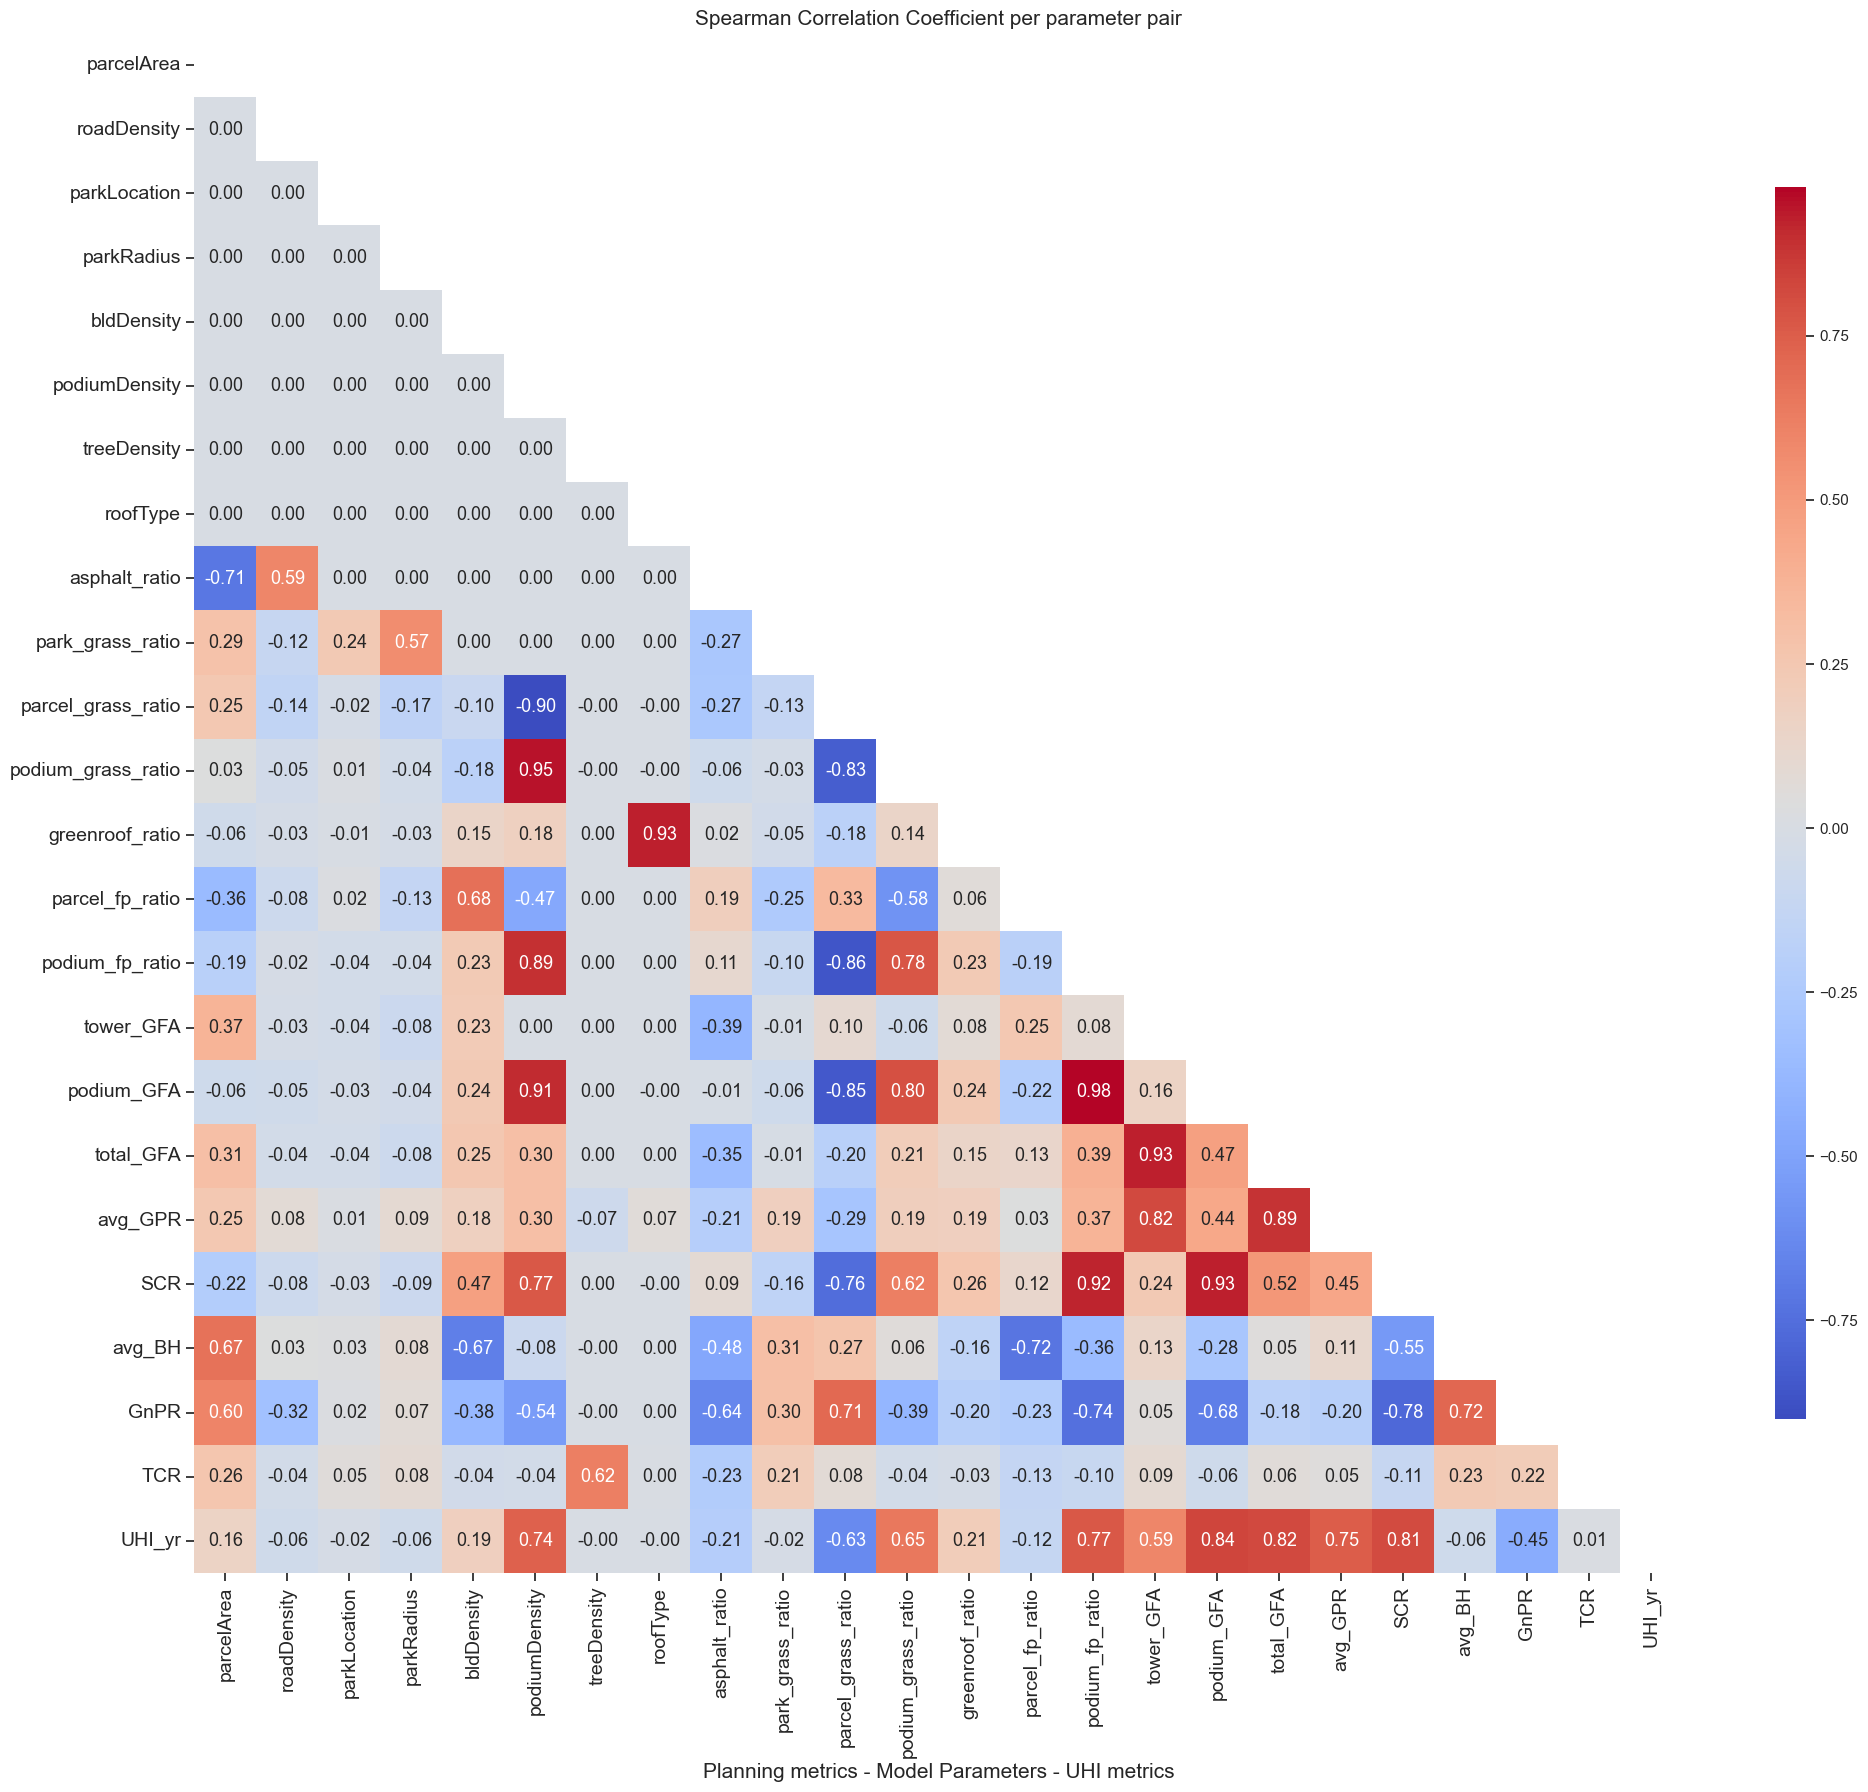

In [10]:
#Define the correlation method with dataset
corr = dataset.corr(method="spearman")

# Set up the matplotlib plot size configuration
f, ax = plt.subplots(figsize=(24, 20))

# # Generate a mask for upper triangle
mask = np.triu(np.ones_like(dataset.corr(method="spearman")))

#set a theme for the plot - this one makes the background of squares white
sns.set_theme(style='ticks')


# Draw the heatmap with custom configurations (check seaborn documentations for other configrations)
heatmap = sns.heatmap(dataset.corr(method="spearman"),     
                      mask=mask, cmap="coolwarm",
                      annot=True,
                      cbar_kws={'shrink': 0.8, 'aspect':40}, 
                      annot_kws={"size": 13}, fmt=".2f") 


# Put the x-labels on top
plt.tick_params(top=False , labeltop=False , bottom = True, labelbottom=True)
# set font size of the x and y variables
plt.tick_params(axis='both', which='major', labelsize=14)


# Add a title
heatmap.set_title("Spearman Correlation Coefficient per parameter pair",fontsize = 15 )
plt.xlabel( "Planning metrics - Model Parameters - UHI metrics", fontsize = 15) # x-axis label with fontsize 15

# #legend styling
# plt.legend(fontsize='15')

#uncomment the below line to save the plot in the working directory
#plt.savefig('heatmap_sca_allData.png', bbox_inches='tight', dpi=300)

#check the plot in this platform
plt.show()

## Filtered Correlation Analysis

- With reference to the correlation analysis image above, features showing moderate to strong coorelation are isolated and visualized in the following section.

In [11]:
#copy the existing dataset
dataset2 = dataset.copy()

In [12]:
#check the dataset and column names
dataset2.describe()

parcelArea  roadDensity  parkLocation   parkRadius   bldDensity  \
count  9000.000000  9000.000000   9000.000000  9000.000000  9000.000000   
mean      4.000000     0.550000     38.000000   200.000000     7.000000   
std       1.414292     0.250014     29.531287    70.714607     2.828584   
min       2.000000     0.300000      0.000000   100.000000     3.000000   
25%       3.000000     0.300000      0.000000   150.000000     5.000000   
50%       4.000000     0.550000     42.000000   200.000000     7.000000   
75%       5.000000     0.800000     72.000000   250.000000     9.000000   
max       6.000000     0.800000     72.000000   300.000000    11.000000   

       podiumDensity  treeDensity     roofType  asphalt_ratio  \
count    9000.000000   9000.00000  9000.000000    9000.000000   
mean        0.200000      4.50000     0.500000       0.110002   
std         0.163308      4.50025     0.500028       0.052442   
min         0.000000      0.00000     0.000000       0.044727   
25%         0.000000      0.00000     0.000000       0.058153   
50%         0.200000      4.50000     0.500000       0.105468   
75%         0.400000      9.00000     1.000000       0.134203   
max         0.400000      9.00000     1.000000       0.220688   

       park_grass_ratio  parcel_grass_ratio  podium_grass_ratio  \
count       9000.000000         9000.000000         9000.000000   
mean           0.081942            0.592834            0.096139   
std            0.053924            0.138922            0.085562   
min            0.000000            0.303380            0.000000   
25%            0.066283            0.469170            0.000000   
50%            0.079221            0.588953            0.091827   
75%            0.093067            0.702823            0.160558   
max            0.288930            0.931001            0.332852   

       greenroof_ratio  parcel_fp_ratio  podium_fp_ratio     tower_GFA  \
count      9000.000000      9000.000000      9000.000000  9.000000e+03   
mean          0.053341         0.051583         0.012396  1.544780e+06   
std           0.064637         0.020885         0.011984  3.781184e+05   
min           0.000000         0.010170         0.000000  6.091205e+05   
25%           0.000000         0.036443         0.000000  1.278000e+06   
50%           0.007202         0.050250         0.010725  1.647100e+06   
75%           0.096853         0.066319         0.020529  1.851725e+06   
max           0.279247         0.115903         0.046171  2.104300e+06   

          podium_GFA     total_GFA      avg_GPR          SCR       avg_BH  \
count    9000.000000  9.000000e+03  9000.000000  9000.000000  9000.000000   
mean   156009.276593  1.700790e+06     1.845831     0.131479    68.273644   
std    146363.843863  4.278508e+05     0.516039     0.073745    24.073906   
min         0.000000  6.091205e+05     0.714996     0.014405    21.000000   
25%         0.000000  1.405200e+06     1.510383     0.072990    49.700000   
50%    141655.103750  1.761500e+06     1.875860     0.117452    68.700000   
75%    258606.839525  2.019000e+06     2.148400     0.181280    87.800000   
max    591814.009700  2.576800e+06     4.766372     0.366506   124.200000   

              GnPR          TCR       UHI_yr  
count  9000.000000  9000.000000  9000.000000  
mean      0.770915     0.017812     0.679039  
std       0.081815     0.029219     0.074495  
min       0.570977     0.000000     0.525034  
25%       0.707067     0.000000     0.621461  
50%       0.776493     0.000000     0.667146  
75%       0.837896     0.046378     0.730637  
max       0.937279     0.119394     0.867409

In [13]:
# Provide column names to delete from the dataset
## this filtering aimed to exclude the parameters other than design model parameters and UHI_yr
drop_columns = [
       'asphalt_ratio', 
       'park_grass_ratio', 'parcel_grass_ratio', 'podium_grass_ratio', 'greenroof_ratio',
       'parcel_fp_ratio', 'podium_fp_ratio','tower_GFA', 'podium_GFA']

#delete the specified columns from the dataset
dataset2.drop(drop_columns, axis= 1, inplace= True)

In [14]:
#check column names to ensure dataset
dataset2.columns

Index(['parcelArea', 'roadDensity', 'parkLocation', 'parkRadius', 'bldDensity',
       'podiumDensity', 'treeDensity', 'roofType', 'total_GFA', 'avg_GPR',
       'SCR', 'avg_BH', 'GnPR', 'TCR', 'UHI_yr'],
      dtype='object')

In [15]:
#check new dataset
dataset2.describe()

parcelArea  roadDensity  parkLocation   parkRadius   bldDensity  \
count  9000.000000  9000.000000   9000.000000  9000.000000  9000.000000   
mean      4.000000     0.550000     38.000000   200.000000     7.000000   
std       1.414292     0.250014     29.531287    70.714607     2.828584   
min       2.000000     0.300000      0.000000   100.000000     3.000000   
25%       3.000000     0.300000      0.000000   150.000000     5.000000   
50%       4.000000     0.550000     42.000000   200.000000     7.000000   
75%       5.000000     0.800000     72.000000   250.000000     9.000000   
max       6.000000     0.800000     72.000000   300.000000    11.000000   

       podiumDensity  treeDensity     roofType     total_GFA      avg_GPR  \
count    9000.000000   9000.00000  9000.000000  9.000000e+03  9000.000000   
mean        0.200000      4.50000     0.500000  1.700790e+06     1.845831   
std         0.163308      4.50025     0.500028  4.278508e+05     0.516039   
min         0.000000      0.00000     0.000000  6.091205e+05     0.714996   
25%         0.000000      0.00000     0.000000  1.405200e+06     1.510383   
50%         0.200000      4.50000     0.500000  1.761500e+06     1.875860   
75%         0.400000      9.00000     1.000000  2.019000e+06     2.148400   
max         0.400000      9.00000     1.000000  2.576800e+06     4.766372   

               SCR       avg_BH         GnPR          TCR       UHI_yr  
count  9000.000000  9000.000000  9000.000000  9000.000000  9000.000000  
mean      0.131479    68.273644     0.770915     0.017812     0.679039  
std       0.073745    24.073906     0.081815     0.029219     0.074495  
min       0.014405    21.000000     0.570977     0.000000     0.525034  
25%       0.072990    49.700000     0.707067     0.000000     0.621461  
50%       0.117452    68.700000     0.776493     0.000000     0.667146  
75%       0.181280    87.800000     0.837896     0.046378     0.730637  
max       0.366506   124.200000     0.937279     0.119394     0.867409

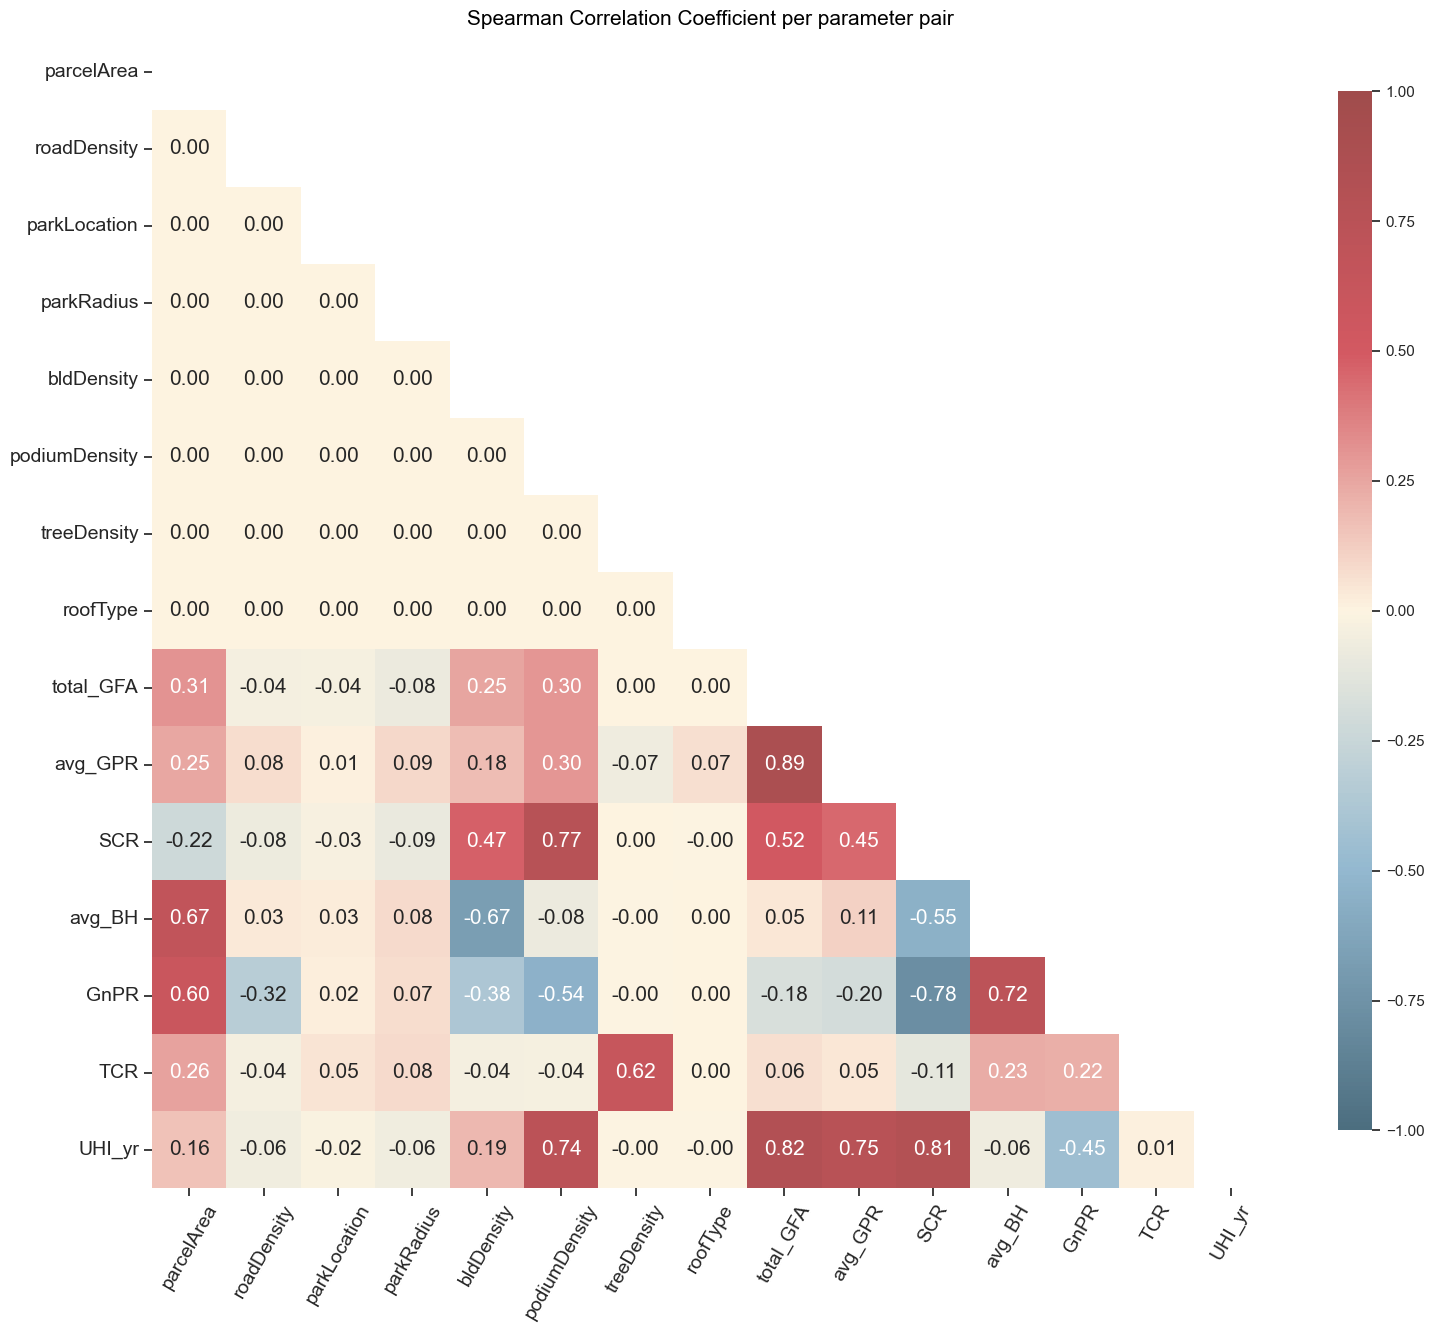

In [16]:
import matplotlib.colors

#Define the correlation method with dataset
corr = dataset2.corr(method="spearman")

# Set up the matplotlib plot size configuration
f, ax = plt.subplots(figsize=(18, 15))

# # Generate a mask for upper triangle
mask = np.triu(np.ones_like(dataset2.corr(method="spearman")))

#color codes blue to red
cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", ["#003049","#669BBC","#FDF0D5","#C1121F","#780000"])

#set a theme for the plot
sns.set_theme(style='ticks')

# Draw the heatmap with custom configurations
heatmap = sns.heatmap(dataset2.corr(method="spearman"), 
                      mask=mask, cmap=cmap,
                      alpha=0.7,
                      vmin = -1, vmax = 1, center = 0,
                      annot=True,
                      cbar_kws={'shrink': 0.9, 'aspect':30}, 
                      annot_kws={"size": 15}, fmt=".2f") 


# Put the x-labels on top
plt.tick_params(top=False , labeltop=False , bottom = True, labelbottom=True)
# set font size of the x and y variables
plt.tick_params(axis='both', which='major', labelsize=14)

#edit the direction of tick labels
plt.yticks(rotation=0) 
plt.xticks(rotation=60) 

#detail the font style
font = {'family': 'Arial',
        'color':  'Black',
        'weight': 'normal',
        'size': 15,
        }

# # Add a title
heatmap.set_title("Spearman Correlation Coefficient per parameter pair",fontdict=font )

#uncomment the below line to save the plot in the working directory
# plt.savefig('heatmap_sca_selectedData2.png', bbox_inches='tight', dpi=300)

#check the plot in this platform
plt.show()

_________________________________

## Pairplot with confidence interval 

- this plot provides scatterplots differntiating various "podium density" values as hue. Additionally, Kernel Density Distribution illustates the distribution of model paramters and simulated objectives. 

In [17]:
#define specific column names to visualize
# select features that sho moderate to strong correlation
significant_Features = ['total_GFA', 'SCR','avg_GPR', 'GnPR', 'UHI_yr','podiumDensity']

c:\Users\prave\anaconda3\envs\prvn\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\prave\anaconda3\envs\prvn\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\prave\anaconda3\envs\prvn\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\prave\anaconda3\envs\prvn\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, Categorica

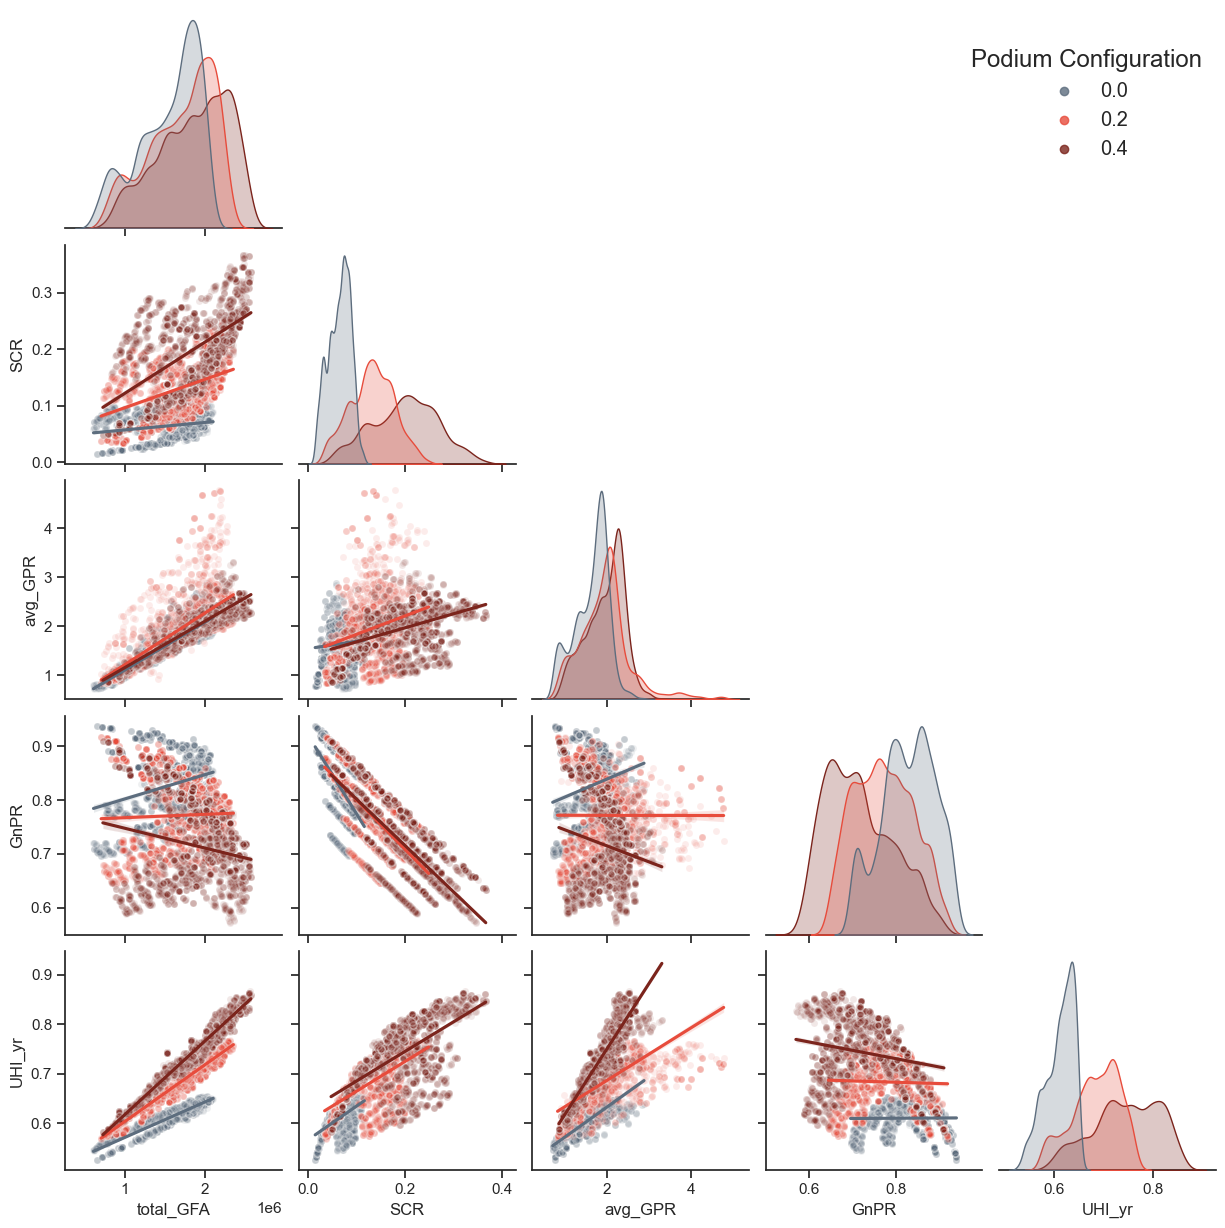

In [18]:
#import libraries
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.collections as mcoll  # Correct import for PathCollection

# Replace inf and -inf with NaN 
dataset2 = dataset2.replace([np.inf, -np.inf], np.nan)

# Define a custom color palette (you can use seaborn's palette or define your own list of colors)
custom_palette = ['#5D6D7E', '#E74C3C', '#7B241C']

# Customize the pairplot with kind = 'reg' (check out seaborn documentation for pairplot for further details)
pairplot = sns.pairplot(
    dataset2[significant_Features], 
    diag_kind="kde", 
    hue='podiumDensity',
    corner=True,
    kind='reg',
    dropna=True,
    palette=custom_palette,
    plot_kws={'ci': 95}  # 95% confidence interval
)

#edit the font size of the axes labels
sns.set_theme(style='ticks')
plt.tick_params(axis='both', which='major', labelsize=24)
#edit the direction of tick labels
plt.yticks(rotation=0) 
plt.xticks(rotation=90) 

sns.move_legend(pairplot,  "lower center",title_fontsize='x-large', 
                fontsize='large', bbox_to_anchor=(0.8, 0.85), ncol=1, title="Podium Configuration", frameon=False)

# post-process the figure to change opacity and marker size
# Loop through the axes to get the PathCollection from scatter plots
for ax in pairplot.axes.flatten():
    if ax is not None:
        # Get the collections of the scatter plot (PathCollections)
        for collection in ax.collections:
            if isinstance(collection, mcoll.PathCollection):  # Correct type check for scatter plots
                # Customize the scatter plot post-creation
                collection.set_alpha(0.1)  # Change transparency
                collection.set_sizes([25] * len(collection.get_sizes()))  # Adjust sizes for all points
                collection.set_edgecolor('white')  # Set edge color for better visibility




# Save the plot as a PNG file
plt.savefig('pairplot_KDE.png', bbox_inches='tight', dpi=300)  # Save the plot

# Show the plot
plt.show()

___________________

- overall check for minimum maximum UHI values for various podium configurations

In [19]:
# Query for shortlisted data based on specified conditions

intersected_data1 = dataset2.query('podiumDensity == 0.0')
print(intersected_data1["UHI_yr"].min())
print(intersected_data1["UHI_yr"].max())
print(intersected_data1["UHI_yr"].mode())

0.525034
0.654532
0    0.608253
Name: UHI_yr, dtype: float64


In [20]:
intersected_data2 = dataset2.query('podiumDensity == 0.2')
print(intersected_data2["UHI_yr"].min())
print(intersected_data2["UHI_yr"].max())

0.568196
0.767043


In [21]:
intersected_data3 = dataset2.query('podiumDensity == 0.4')
print(intersected_data3["UHI_yr"].min())
print(intersected_data3["UHI_yr"].max())

0.580925
0.867409


______________________

# Scatter Plot  

- This scatter plot aimed to visualize relationship between Gross Floor Area (GFA) and Urban Heat Island (UHI_yr) in conjuctction to Green Plot Ratio (GnPR) and podium density parameters.

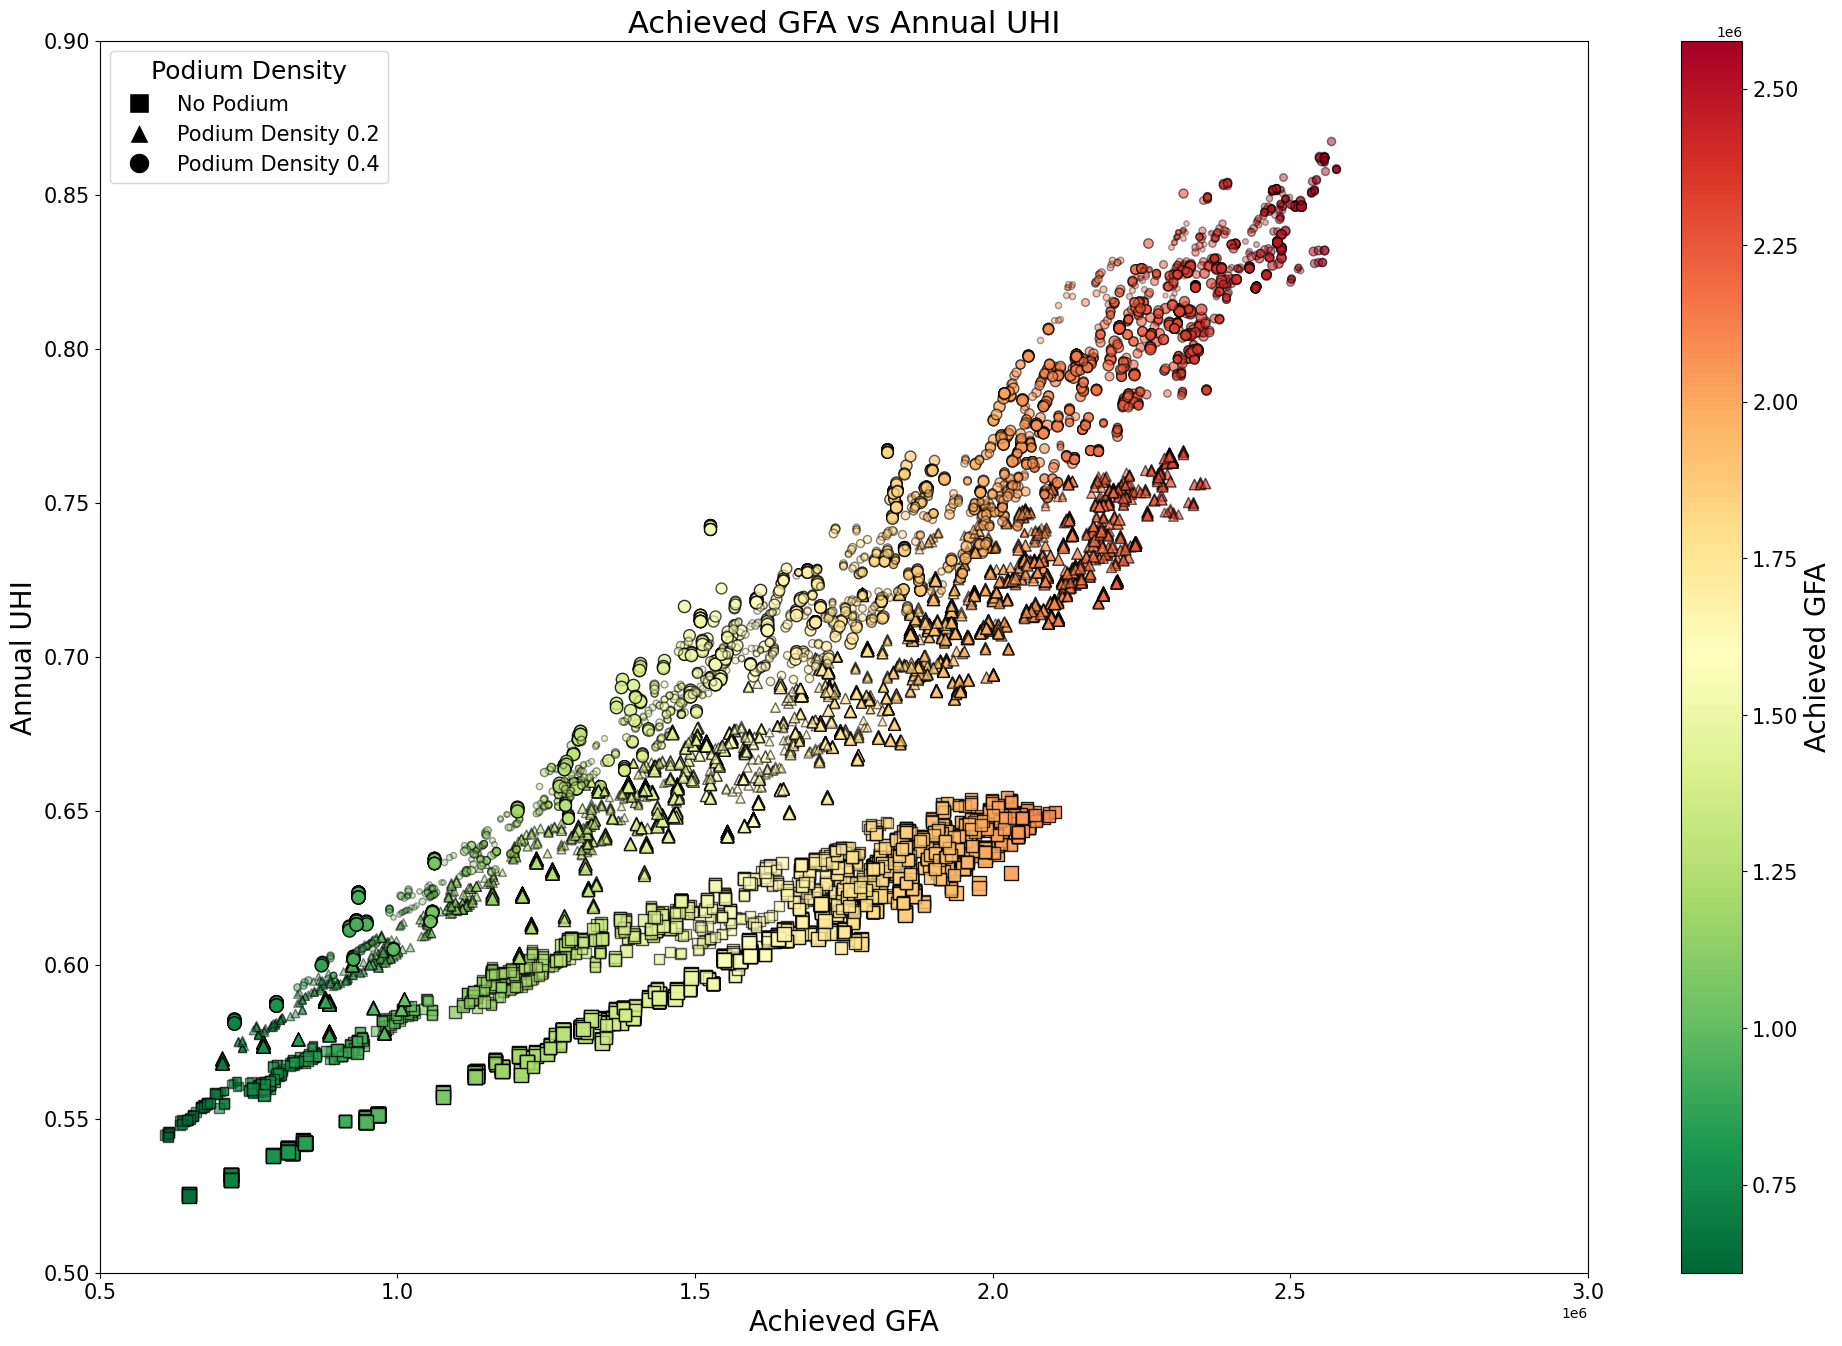

In [7]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.cm as cm

# Set the style for a white background (default behavior)
plt.style.use('default')  # This is optional; matplotlib uses white background by default.

#please edit UHI according to selected dataset
y_var = dataset['UHI_yr']
x_var = dataset['total_GFA']
# list comprehension to set a rule based shape for points in scatterplot
markers = ['s' if x == 0.0 else '^' if x == 0.2 else 'o' for x in dataset['podiumDensity']]

#### Use Size and alphas to distingush grasscover. 
# Get the maximum and minimum of total_grass_ratio
gRat_max = dataset['GnPR'].max()
gRat_min = dataset['GnPR'].min()

# Normalize total_grass_ratio values to range between 0 and 1
normalized_grass_ratio = (dataset['GnPR'] - gRat_min) / (gRat_max - gRat_min)

# Scale normalized values to range between 0.3 and 1.0 (0 alpha == completely transparent)
alphas = 0.3 + (normalized_grass_ratio * (1 - 0.3))

# Convert alphas to a list if needed (for use in scatter plot)
alphas = alphas.tolist()  # This step is only needed if you want a list instead of a pandas Series

# Scale normalized values to range between 10 and 100
sizes = 10 + (normalized_grass_ratio * (100 - 10))

# Convert sizes to a list if needed (for use in scatter plot)
sizes = sizes.tolist()  # This step is only needed if you want a list instead of a pandas Series

#calculate minimum and maximum GFA
aGFA_max = dataset['total_GFA'].max()
aGFA_min = dataset['total_GFA'].min()

# Normalize achieved GFA values to range between 0 and 1
normalized_gfa = (dataset['total_GFA'] - aGFA_min) / (aGFA_max - aGFA_min)

# Map normalized values to a diverging colormap (e.g., Spectral)
colormap = plt.cm.RdYlGn.reversed()  # Use the reversed colormap
colors = colormap(normalized_gfa)

# Create a figure with a specific size
fig, ax = plt.subplots(figsize=(24, 16))

# Loop through the dataset to plot each point individually
for i in range(len(x_var)):
    ax.scatter(
        x_var.iloc[i], 
        y_var.iloc[i], 
        color=colors[i], 
        marker=markers[i], 
        s=sizes[i], 
        alpha=alphas[i],
        edgecolor='black',  # Set edge color to black for better visibility on white background
        linewidth=1         # Set edge width (optional)
    ) 

# Set the axis labels and title with color adjustments
ax.set_xlabel('Achieved GFA', fontsize=20, color='black')
ax.set_ylabel('Annual UHI', fontsize=20, color='black')
ax.set_title('Achieved GFA vs Annual UHI', fontsize=22, color='black')
plt.xticks(fontsize=15, color='black')  # Change x-ticks color
plt.yticks(fontsize=15, color='black')  # Change y-ticks color

# Set limits for x and y axis 
ax.set_ybound(0.5, 0.9)
ax.set_xbound(500000, 3000000)

#Add a legends
handles = [plt.Line2D([0], [0], marker='s', color='w', label='No Podium', markersize=15, markerfacecolor='black'),
           plt.Line2D([0], [0], marker='^', color='w', label='Podium Density 0.2', markersize=15, markerfacecolor='black'),
           plt.Line2D([0], [0], marker='o', color='w', label='Podium Density 0.4', markersize=15, markerfacecolor='black')]

ax.legend(handles=handles, loc='upper left', fontsize=15, title='Podium Density', title_fontsize='18')

# Add a colorbar with label
cbar = plt.colorbar(cm.ScalarMappable(norm=plt.Normalize(vmin=aGFA_min, vmax=aGFA_max), cmap=colormap), ax=ax)
cbar.set_label('Achieved GFA', fontsize=20, color='black')  # Set color of colorbar label
cbar.ax.yaxis.set_tick_params(color='black', labelsize = 15)  # Set color of colorbar ticks

# Save the plot as a PNG file
plt.savefig('scatter_GFA_UHI_allData.png', bbox_inches='tight', dpi=300)

#show the plot in this platform
plt.show()


# Shortlisting few datapoints based on specified conditions and highlight

- use query function and conditionals to shortlist a few subset of data,
- store them in a new DataFrame called a 'Shortlisted_data'
- Apply the same logic with a negation sign or tilda (~) to retrive all other samples and store them as 'other_data'

# Intersected data visualization

- The value range of 0.581 < UHI_yr < 0.655 is obtained from KDE visualization of UHI / podium density parameter.

In [22]:
# Query for shortlisted data based on specified conditions
intersected_data = dataset2.query('UHI_yr >0.581  & UHI_yr <0.655')

# Query for other data that not meet the shortlisted criteria
remained_data = dataset2.query('~(UHI_yr >0.581  & UHI_yr <0.655)')

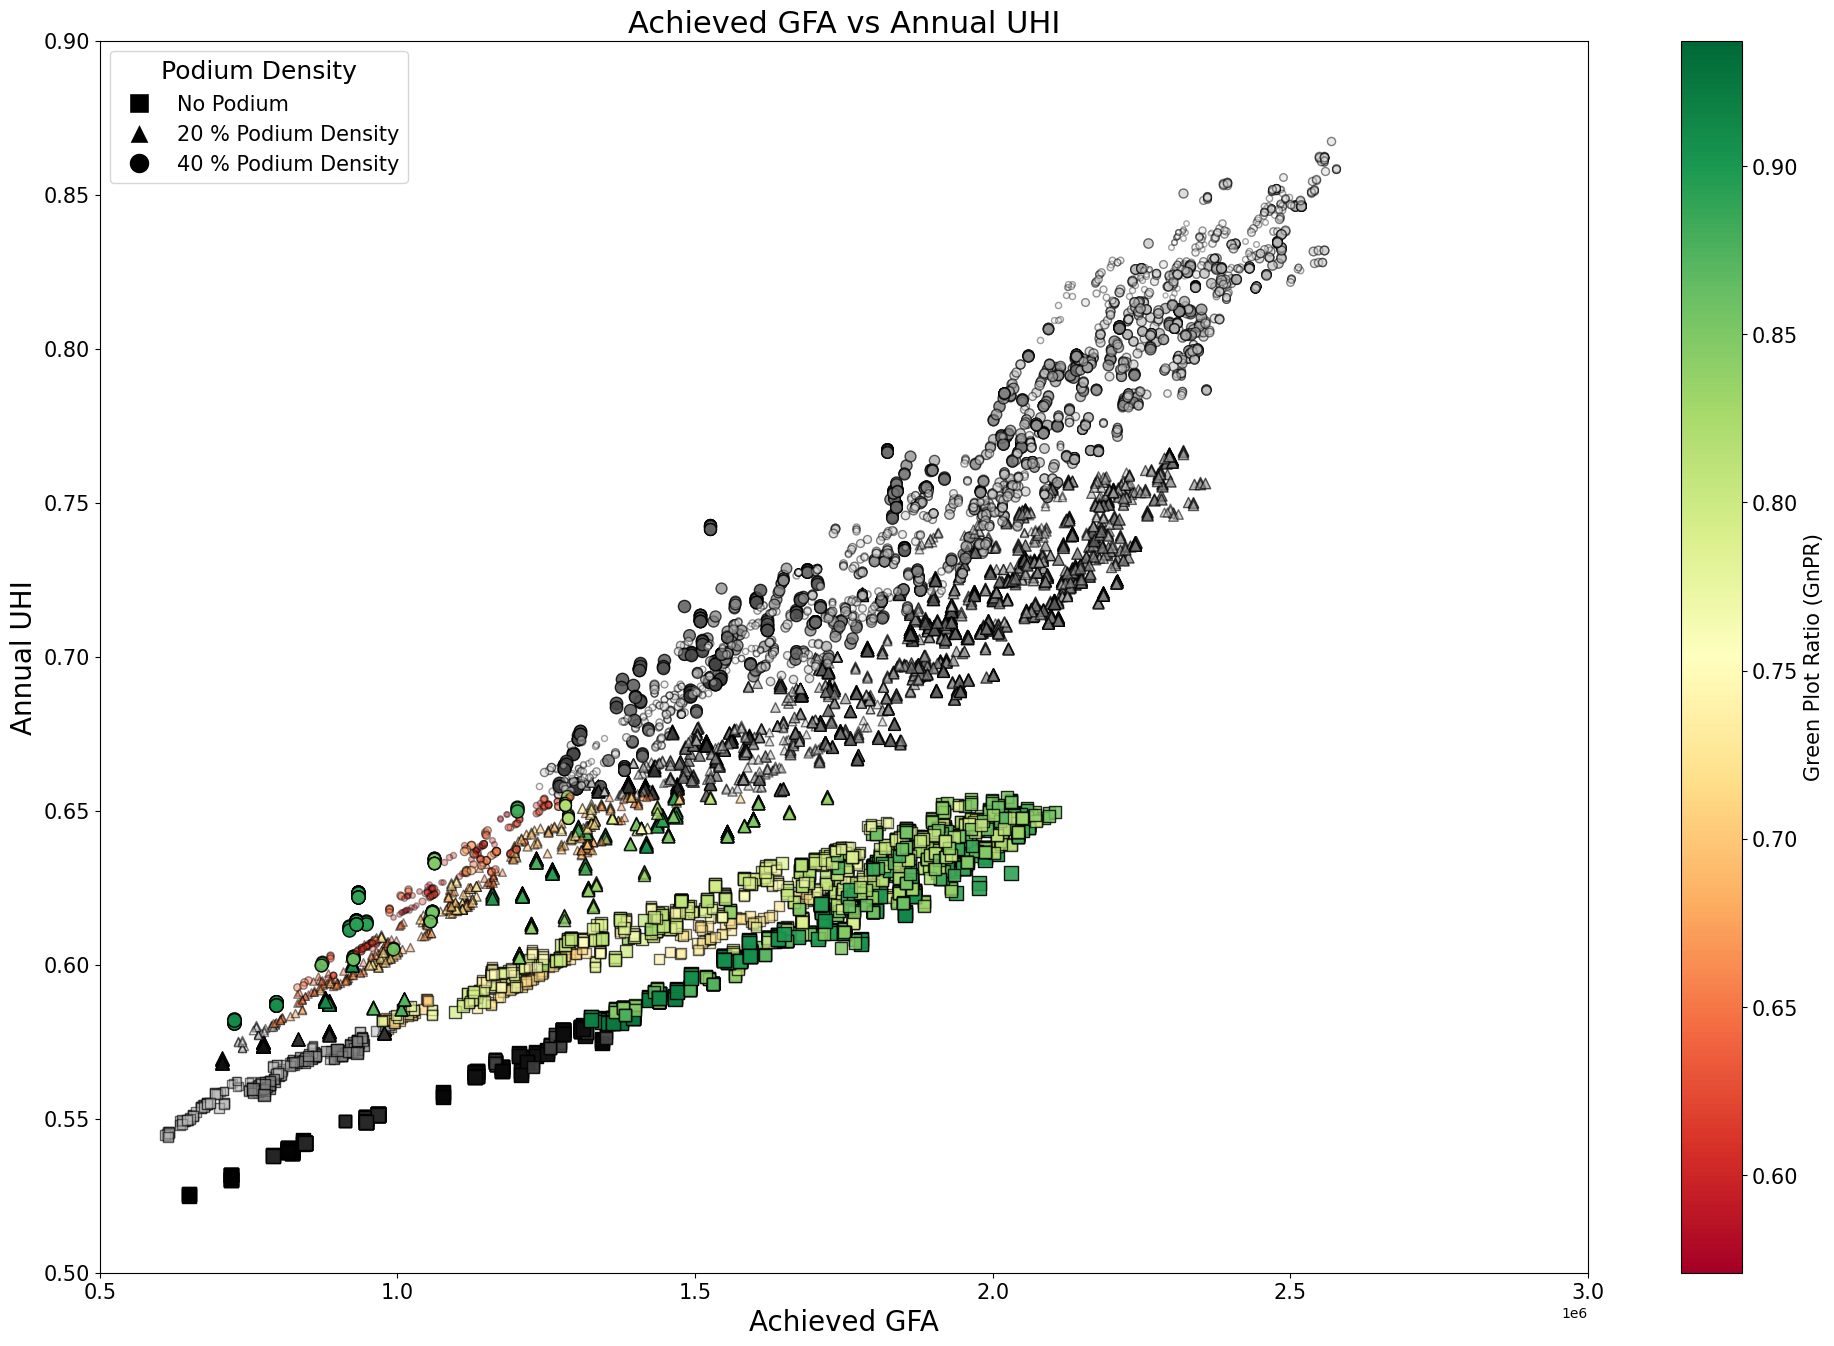

In [23]:

# Import libraries 
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.cm as cm

# Set the style for a white background (default behavior)
plt.style.use('default')

## Normalise a few useful columns to use them as a color, transparancy or size chanel for the plot
# Get the maximum and minimum of total_grass_ratio
gRat_max = dataset2['GnPR'].max()
gRat_min = dataset2['GnPR'].min()
# Get the maximum and minimum of total_GFA
aGFA_max = dataset2['total_GFA'].max()
aGFA_min = dataset2['total_GFA'].min()

# store the two seperated dataframes in a list 'dfs'
dfs = [remained_data, intersected_data]

# Create a figure with a specific size
fig, ax = plt.subplots(figsize=(24, 16))

for i, df in enumerate(dfs):
    # Normalize total_grass_ratio values to range between 0 and 1
    normalized_grass_ratio = (df['GnPR'] - gRat_min) / (gRat_max - gRat_min)

    # Scale normalized values to range between 0.3 and 1.0 for alpha
    alphas = 0.3 + (normalized_grass_ratio * (1 - 0.3))
    alphas = alphas.tolist()

    # Scale normalized values to range between 10 and 100 for size
    sizes = (10 + (normalized_grass_ratio * (100 - 10)))
    sizes = sizes.tolist()

    # Normalize achieved GFA values to range between 0 and 1
    normalized_gfa = (df['total_GFA'] - aGFA_min) / (aGFA_max - aGFA_min)

    # Set colormap
    #colormap = plt.get_cmap('Greys') if i == 0 else plt.cm.RdYlGn.reversed()
    colormap = plt.get_cmap('Greys') if i == 0 else plt.cm.RdYlGn
    colors = colormap(normalized_grass_ratio)

    y_var = df['UHI_yr']
    x_var = df['total_GFA']
    markers = ['s' if x == 0.0 else '^' if x == 0.2 else 'o' for x in df['podiumDensity']]

    # Loop through the dataset to plot each point individually
    for j in range(len(x_var)):
        ax.scatter(
            x_var.iloc[j],
            y_var.iloc[j],
            color=colors[j],
            marker=markers[j],
            s=sizes[j],
            alpha=alphas[j],
            edgecolor='black',
            linewidth=1
        )

## CHART CUSTOMIZATION
# Set axis labels and title
ax.set_xlabel('Achieved GFA', fontsize=20, color='black')
ax.set_ylabel('Annual UHI', fontsize=20, color='black')
ax.set_title('Achieved GFA vs Annual UHI', fontsize=22, color='black')
plt.xticks(fontsize=15, color='black')
plt.yticks(fontsize=15, color='black')

ax.set_ybound(0.5, 0.9)
ax.set_xbound(500000, 3000000)

# Add a legend
handles = [
    plt.Line2D([0], [0], marker='s', color='w', label='No Podium', markersize=15, markerfacecolor='black'),
    plt.Line2D([0], [0], marker='^', color='w', label='20 % Podium Density', markersize=15, markerfacecolor='black'),
    plt.Line2D([0], [0], marker='o', color='w', label='40 % Podium Density', markersize=15, markerfacecolor='black')
]
ax.legend(handles=handles, loc='upper left', fontsize=15, title='Podium Density', title_fontsize='18')

# Add a colorbar
cbar = plt.colorbar(cm.ScalarMappable(norm=plt.Normalize(vmin=gRat_min, vmax=gRat_max), cmap=colormap), ax=ax)
cbar.set_label('Green Plot Ratio (GnPR)', fontsize=15, color='black')
cbar.ax.yaxis.set_tick_params(color='black', labelsize = 15)

# Save the plot
#plt.savefig('filtered_scatter1.png', bbox_inches='tight', dpi=300)
plt.show()


- The value range of UHI_yr < 0.65 & GnPR > 0.7 are testing low UHI high Greenery coverage models.

In [24]:
# Query for shortlisted data based on specified conditions
shortlisted_data = dataset2.query('UHI_yr < 0.65 & GnPR > 0.7')

# Query for other data that does not meet the shortlisted criteria
other_data = dataset2.query('~(UHI_yr < 0.65 & GnPR > 0.7)')


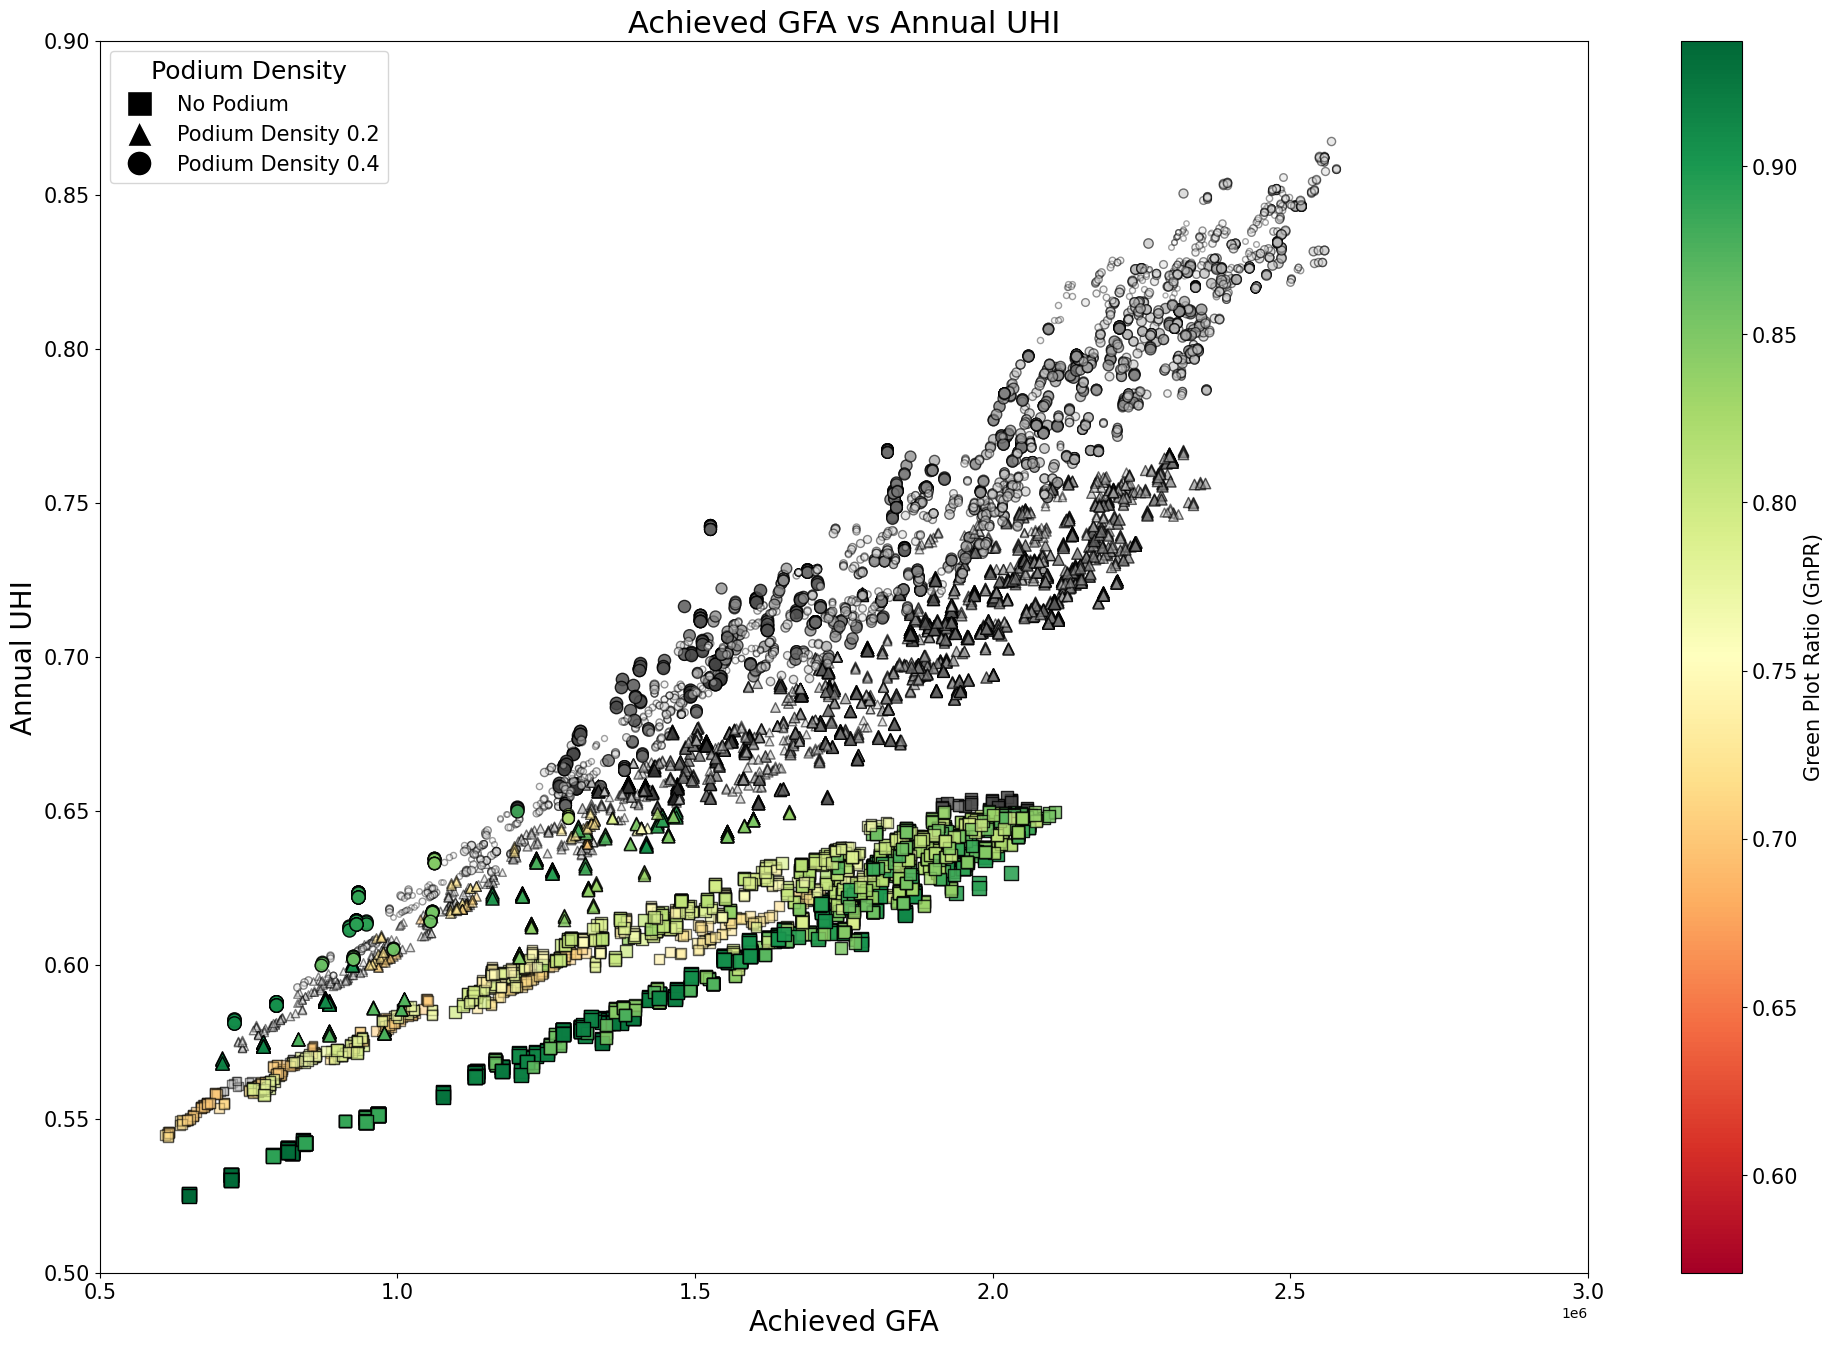

In [25]:
# Import libraries 
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.cm as cm

# Set the style for a white background (default behavior)
plt.style.use('default')

## Normalise a few useful columns to use them as a color, transparancy or size chanel for the plot
# Get the maximum and minimum of total_grass_ratio
gRat_max = dataset2['GnPR'].max()
gRat_min = dataset2['GnPR'].min()
# Get the maximum and minimum of total_GFA
aGFA_max = dataset2['total_GFA'].max()
aGFA_min = dataset2['total_GFA'].min()

# store the two seperated dataframes in a list 'dfs'
dfs = [other_data, shortlisted_data]

# Create a figure with a specific size
fig, ax = plt.subplots(figsize=(24, 16))

for i, df in enumerate(dfs):
    # Normalize total_grass_ratio values to range between 0 and 1
    normalized_grass_ratio = (df['GnPR'] - gRat_min) / (gRat_max - gRat_min)

    # Scale normalized values to range between 0.3 and 1.0 for alpha
    alphas = 0.3 + (normalized_grass_ratio * (1 - 0.3))
    alphas = alphas.tolist()

    # Scale normalized values to range between 10 and 100 for size
    sizes = (10 + (normalized_grass_ratio * (100 - 10)))
    sizes = sizes.tolist()

    # Normalize achieved GFA values to range between 0 and 1
    normalized_gfa = (df['total_GFA'] - aGFA_min) / (aGFA_max - aGFA_min)

    # Set colormap
    #colormap = plt.get_cmap('Greys') if i == 0 else plt.cm.RdYlGn.reversed()
    colormap = plt.get_cmap('Greys') if i == 0 else plt.cm.RdYlGn
    colors = colormap(normalized_grass_ratio)

    y_var = df['UHI_yr']
    x_var = df['total_GFA']
    markers = ['s' if x == 0.0 else '^' if x == 0.2 else 'o' for x in df['podiumDensity']]

    # Loop through the dataset to plot each point individually
    for j in range(len(x_var)):
        ax.scatter(
            x_var.iloc[j],
            y_var.iloc[j],
            color=colors[j],
            marker=markers[j],
            s=sizes[j],
            alpha=alphas[j],
            edgecolor='black',
            linewidth=1
        )

## CHART CUSTOMIZATION
# Set axis labels and title
ax.set_xlabel('Achieved GFA', fontsize=20, color='black')
ax.set_ylabel('Annual UHI', fontsize=20, color='black')
ax.set_title('Achieved GFA vs Annual UHI', fontsize=22, color='black')
plt.xticks(fontsize=15, color='black')
plt.yticks(fontsize=15, color='black')

ax.set_ybound(0.5, 0.9)
ax.set_xbound(500000, 3000000)

# Add a legend
handles = [
    plt.Line2D([0], [0], marker='s', color='w', label='No Podium', markersize=18, markerfacecolor='black'),
    plt.Line2D([0], [0], marker='^', color='w', label='Podium Density 0.2', markersize=18, markerfacecolor='black'),
    plt.Line2D([0], [0], marker='o', color='w', label='Podium Density 0.4', markersize=18, markerfacecolor='black')
]
ax.legend(handles=handles, loc='upper left', fontsize=15, title='Podium Density', title_fontsize='18')

# Add a colorbar
cbar = plt.colorbar(cm.ScalarMappable(norm=plt.Normalize(vmin=gRat_min, vmax=gRat_max), cmap=colormap), ax=ax)
cbar.set_label('Green Plot Ratio (GnPR)', fontsize=15, color='black')
cbar.ax.yaxis.set_tick_params(color='black', labelsize = 15)

# Save the plot
#plt.savefig('filtered_scatter2.png', bbox_inches='tight', dpi=300)
plt.show()


___________________________________________

# Combine 2 plots in 1 figure

In [26]:
shortlisted_data1 = dataset2.query('UHI_yr >0.581  & UHI_yr <0.655')

# Query for other data that does not meet the shortlisted criteria
other_data1 = dataset2.query('~(UHI_yr >0.581  & UHI_yr <0.655)')

# Query for shortlisted data based on specified conditions
shortlisted_data2 = dataset2.query('UHI_yr < 0.65 & GnPR > 0.7')

# Query for other data that does not meet the shortlisted criteria
other_data2 = dataset2.query('~(UHI_yr < 0.65 & GnPR > 0.7)')



- this visualization takes about 5 minutes to complete.

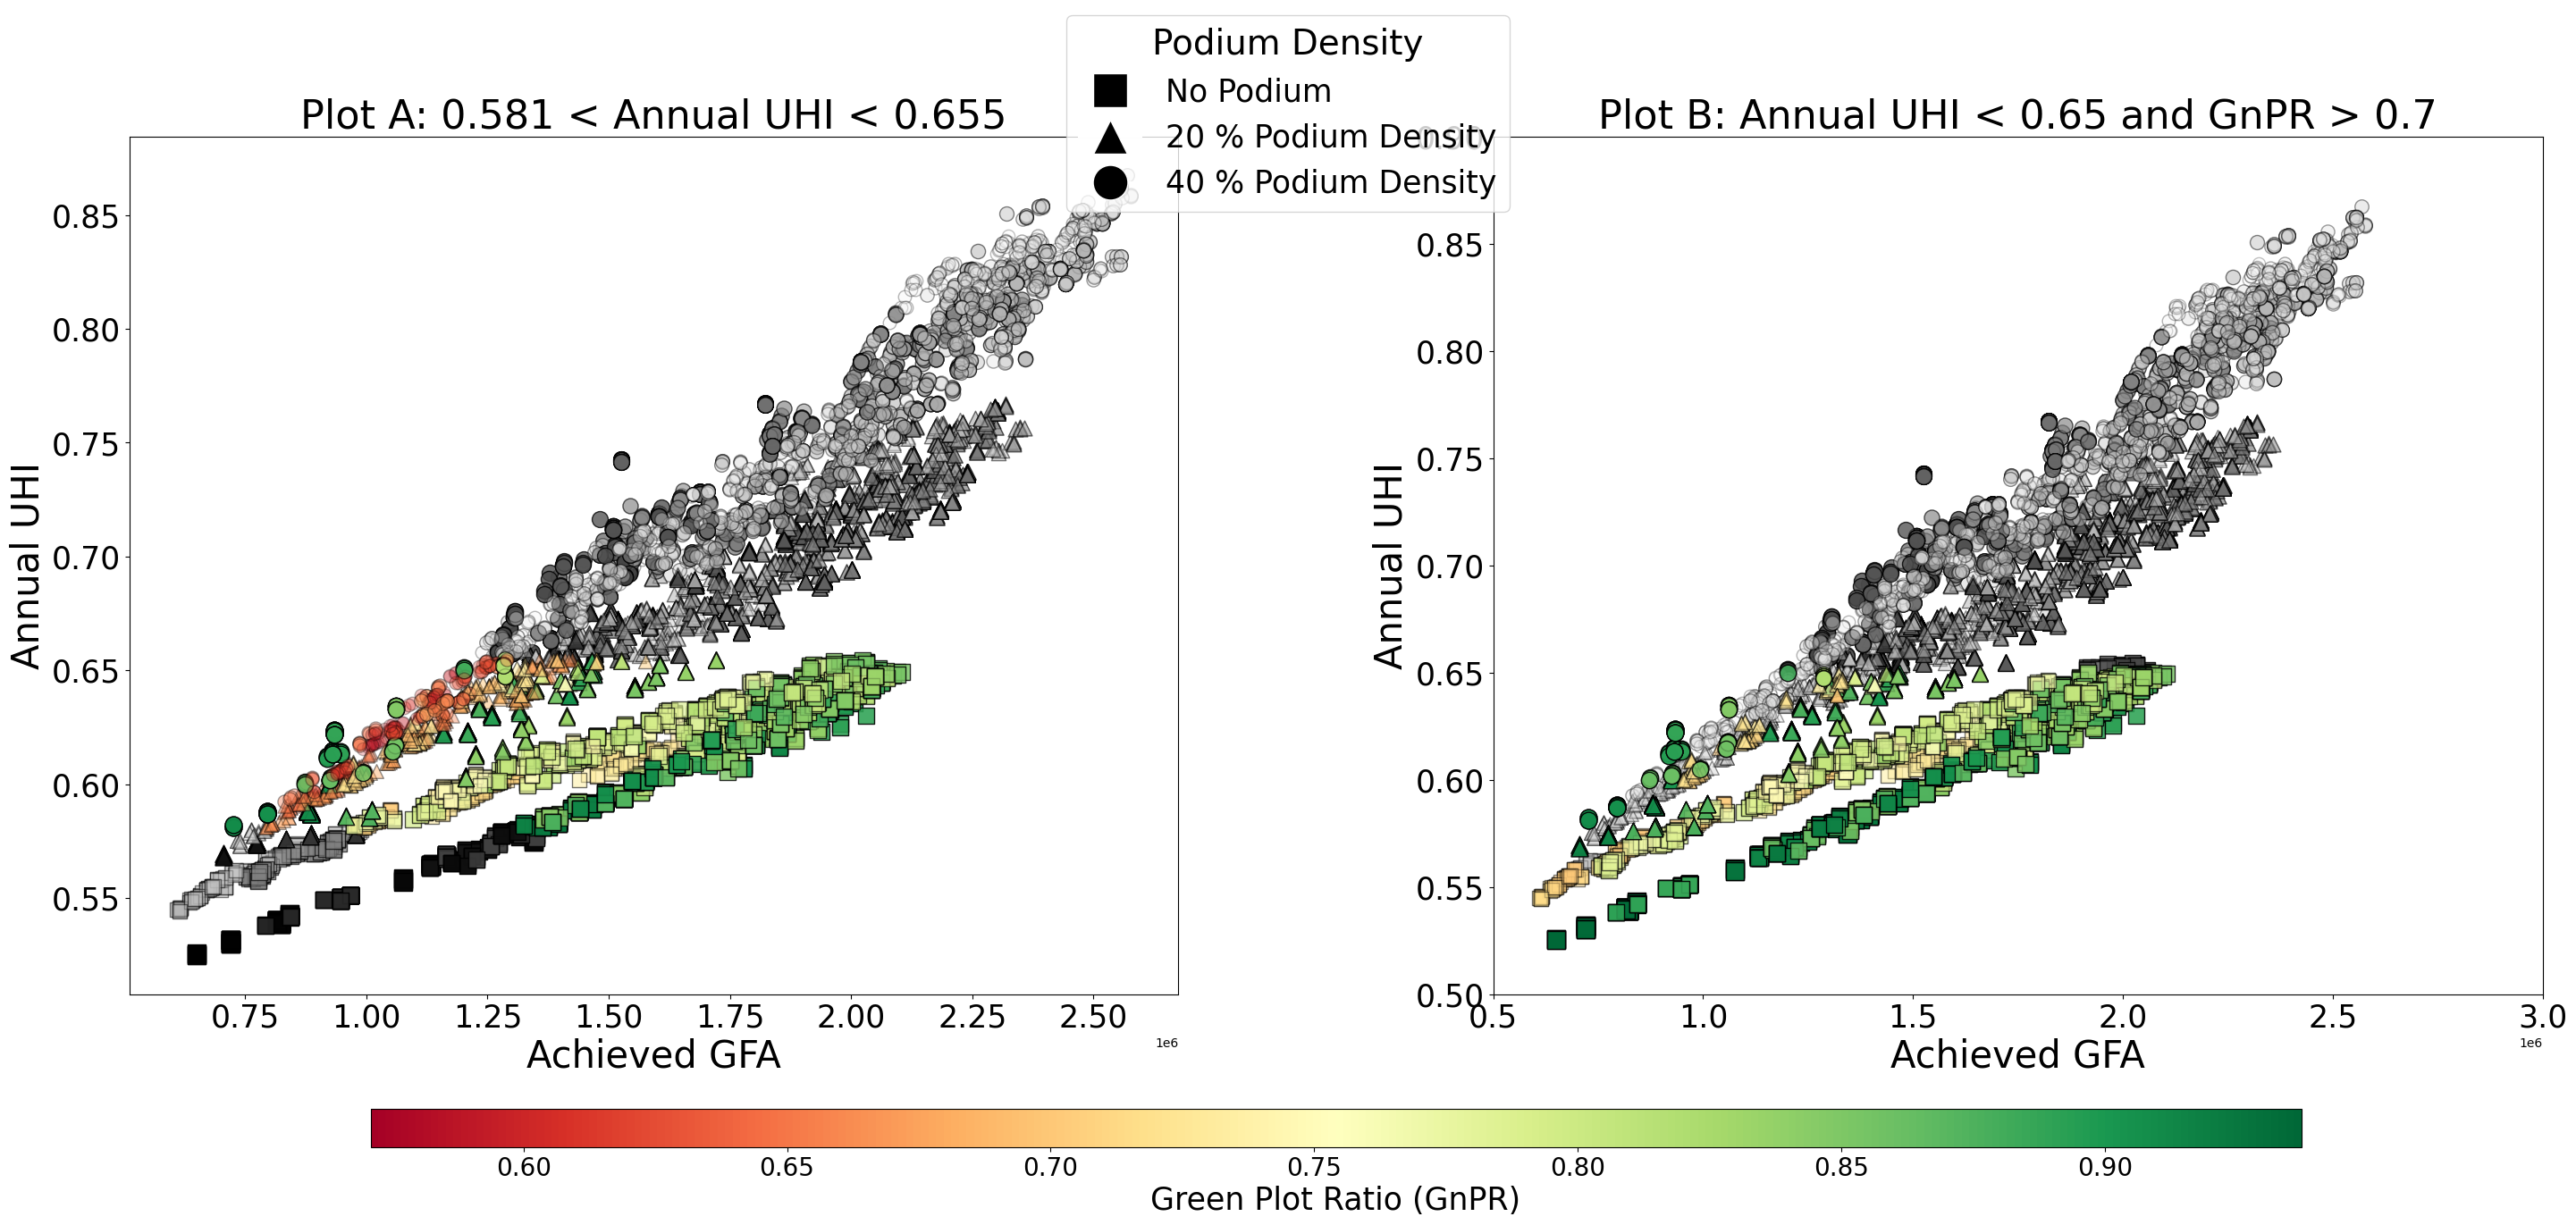

In [27]:
# Import libraries 
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.cm as cm

# Create two subplots side by side
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(30, 16))

# store the two seperated dataframes in a list 'dfs'

dfs1 = [other_data1, shortlisted_data1]
dfs2 = [other_data2, shortlisted_data2]

## Normalise a few useful columns to use them as a color, transparancy or size chanel for the plot
# Get the maximum and minimum of total_grass_ratio
gRat_max = dataset2['GnPR'].max()
gRat_min = dataset2['GnPR'].min()
# Get the maximum and minimum of total_GFA
aGFA_max = dataset2['total_GFA'].max()
aGFA_min = dataset2['total_GFA'].min()

# Plot for the first group of data on ax1
for i, df in enumerate(dfs2):
    normalized_grass_ratio = (df['GnPR'] - gRat_min) / (gRat_max - gRat_min)
    alphas = 0.2 + (normalized_grass_ratio * (1 - 0.2))
    alphas = alphas.tolist()
    sizes = (100 + (normalized_grass_ratio * (100 - 10))).tolist()
    normalized_gfa = (df['total_GFA'] - aGFA_min) / (aGFA_max - aGFA_min)
    colormap1 = plt.get_cmap('Greys') if i == 0 else plt.cm.RdYlGn
    colors = colormap1(normalized_grass_ratio)

    y_var = df['UHI_yr']
    x_var = df['total_GFA']
    markers = ['s' if x == 0.0 else '^' if x == 0.2 else 'o' for x in df['podiumDensity']]

    for j in range(len(x_var)):
        ax2.scatter(
            x_var.iloc[j],
            y_var.iloc[j],
            color=colors[j],
            marker=markers[j],
            s=sizes[j],
            alpha=alphas[j],
            edgecolor='black',
            linewidth=1
        )


# Chart customization for ax1
ax1.set_xlabel('Achieved GFA', fontsize=30)
ax1.set_ylabel('Annual UHI', fontsize=30)
ax1.set_title('Plot A: 0.581 < Annual UHI < 0.655', fontsize=32)
ax1.set_ybound(0.5, 0.9)
ax1.set_xbound(500000, 3000000)
ax1.tick_params(axis='both', which='major', labelsize=25)


# Plot for the first group of data on ax2
for i, df in enumerate(dfs1):
    normalized_grass_ratio = (df['GnPR'] - gRat_min) / (gRat_max - gRat_min)
    alphas = 0.2 + (normalized_grass_ratio * (1 - 0.2))
    alphas = alphas.tolist()
    sizes = (100 + (normalized_grass_ratio * (100 - 10))).tolist()
    normalized_gfa = (df['total_GFA'] - aGFA_min) / (aGFA_max - aGFA_min)
    colormap2 = plt.get_cmap('Greys') if i == 0 else plt.cm.RdYlGn
    colors = colormap2(normalized_grass_ratio)

    y_var = df['UHI_yr']
    x_var = df['total_GFA']
    markers = ['s' if x == 0.0 else '^' if x == 0.2 else 'o' for x in df['podiumDensity']]

    for j in range(len(x_var)):
        ax1.scatter(
            x_var.iloc[j],
            y_var.iloc[j],
            color=colors[j],
            marker=markers[j],
            s=sizes[j],
            alpha=alphas[j],
            edgecolor='black',
            linewidth=1
        )


# Chart customization for ax2
ax2.set_xlabel('Achieved GFA', fontsize=30)
ax2.set_ylabel('Annual UHI', fontsize=30)
ax2.set_title('Plot B: Annual UHI < 0.65 and GnPR > 0.7', fontsize=32)
ax2.set_ybound(0.5, 0.9)
ax2.set_xbound(500000, 3000000)
ax2.tick_params(axis='both', which='major', labelsize=25)

# Add a common legend
handles = [
    plt.Line2D([0], [0], marker='s', color='w', label='No Podium', markersize=28, markerfacecolor='black'),
    plt.Line2D([0], [0], marker='^', color='w', label='20 % Podium Density', markersize=28, markerfacecolor='black'),
    plt.Line2D([0], [0], marker='o', color='w', label='40 % Podium Density', markersize=28, markerfacecolor='black')
]
fig.legend(handles=handles, loc='upper center', fontsize=25, title='Podium Density', title_fontsize='28')



# Display the plot
fig.subplots_adjust(left=0.05, right=0.95, top=0.9, bottom=0.1, wspace=0.3, hspace=0.5)

# Add the colorbar
cbar = fig.colorbar(cm.ScalarMappable(norm=plt.Normalize(vmin=gRat_min, vmax=gRat_max), cmap=colormap1), 
                    ax=[ax1, ax2], orientation='horizontal', pad=0.1, shrink=0.8, aspect=50)
cbar.set_label('Green Plot Ratio (GnPR)', fontsize=25, color='black')
cbar.ax.xaxis.set_tick_params(color='black', labelsize=20)

# Display the plot
plt.xticks(fontsize=25, color='black')
plt.yticks(fontsize=25, color='black')

# Save the plot
#plt.savefig('multi_facet2.png', bbox_inches='tight', dpi=300)
plt.show()



___________________

# Illustrate the selected model results

In [28]:
dataset3 = pd.read_csv(data)

### query command aids selecting specific solutions by using input parameter value ranges

In [29]:
Model_2ha = dataset3.query('parcelArea == 2 & podiumDensity == 0.4 & parkRadius == 100 & bldDensity == 9 & treeDensity == 9 ').sort_values('UHI_yr', ascending=True)
Model_2ha

# model 8700 was selected

sim_no    UHI_yr  asphalt_ratio  park_grass_ratio  parcel_grass_ratio  \
8785    8785  0.635833       0.220688          0.015661            0.377027   
4285    4285  0.636530       0.220688          0.015661            0.376368   
4275    4275  0.637272       0.220688          0.029264            0.395461   
8775    8775  0.637363       0.220688          0.029264            0.395461   
8780    8780  0.639441       0.220688          0.017183            0.386848   
4280    4280  0.639555       0.220688          0.017183            0.386848   
8710    8710  0.681678       0.134203          0.020337            0.408302   
8705    8705  0.682705       0.134203          0.017184            0.419395   
4210    4210  0.683699       0.134203          0.020337            0.409621   
4205    4205  0.684235       0.134203          0.017184            0.417359   
4200    4200  0.687694       0.134203          0.034899            0.419476   
8700    8700  0.690411       0.134203          0.034899            0.418759   

      podium_grass_ratio      GnPR  TCR  greenroof_ratio       SCR  \
8785            0.203822  0.596510  0.0         0.149961  0.215643   
4285            0.204492  0.596521  0.0         0.000000  0.215633   
4275            0.175893  0.600618  0.0         0.000000  0.211437   
8775            0.175893  0.600618  0.0         0.145951  0.211437   
8780            0.195589  0.599620  0.0         0.148006  0.211380   
4280            0.195589  0.599620  0.0         0.000000  0.211380   
8710            0.195200  0.623839  0.0         0.200370  0.283545   
8705            0.192949  0.629528  0.0         0.195199  0.277341   
4210            0.193985  0.623943  0.0         0.000000  0.284136   
4205            0.192949  0.627492  0.0         0.000000  0.279376   
4200            0.170973  0.625348  0.0         0.000000  0.281165   
8700            0.169740  0.623398  0.0         0.200988  0.283810   

      parcel_fp_ratio  podium_fp_ratio     tower_GFA   podium_GFA  total_GFA  \
8785         0.046945         0.032841  8.168903e+05  313998.8144  1130900.0   
4285         0.047605         0.032841  8.229863e+05  312452.1576  1135400.0   
4275         0.043466         0.032743  8.186082e+05  312545.9942  1131200.0   
8775         0.043466         0.032743  8.201322e+05  312545.9942  1132700.0   
8780         0.046114         0.031687  8.365343e+05  308733.7418  1145300.0   
4280         0.046114         0.031687  8.365343e+05  308733.7418  1145300.0   
8710         0.052951         0.041588  9.844262e+05  436841.2143  1421300.0   
8705         0.050837         0.041071  9.931616e+05  428581.0881  1421700.0   
4210         0.051632         0.042283  9.889373e+05  439648.4257  1428600.0   
4205         0.052872         0.041071  1.011200e+06  428581.0881  1439800.0   
4200         0.053091         0.040716  1.023600e+06  433030.4249  1456600.0   
8700         0.053808         0.041411  1.039900e+06  435881.6546  1475800.0   

      avg_BH   avg_GPR  parcelArea  parkLocation  parkRadius  roadDensity  \
8785    25.9  1.154679           2            72         100          0.8   
4285    25.9  1.159013           2            72         100          0.8   
4275    27.1  1.205111           2             0         100          0.8   
8775    27.1  1.205462           2             0         100          0.8   
8780    27.4  1.176949           2            42         100          0.8   
4280    27.4  1.176949           2            42         100          0.8   
8710    26.5  1.329845           2            72         100          0.3   
8705    27.6  1.338996           2            42         100          0.3   
4210    26.8  1.334503           2            72         100          0.3   
4205    27.5  1.358751           2            42         100          0.3   
4200    27.9  1.420278           2             0         100          0.3   
8700    28.0  1.437698           2             0         100          0.3   

      bldDensity  podium

In [30]:
Model_2ha = dataset3.query('parcelArea == 2 & podiumDensity == 0.2 & parkRadius == 200 & bldDensity == 9 & treeDensity == 9 ').sort_values('UHI_yr', ascending=True)
Model_2ha

# model 3485 was selected

sim_no    UHI_yr  asphalt_ratio  park_grass_ratio  parcel_grass_ratio  \
8060    8060  0.584167       0.220688          0.083981            0.497552   
3560    3560  0.585571       0.220688          0.083981            0.496892   
3565    3565  0.595628       0.220688          0.074712            0.499481   
8065    8065  0.596598       0.220688          0.074712            0.499481   
8055    8055  0.597215       0.220688          0.046107            0.529313   
3555    3555  0.598333       0.220688          0.046107            0.528965   
3485    3485  0.617728       0.134203          0.083967            0.543200   
7990    7990  0.618014       0.134203          0.088338            0.539845   
7985    7985  0.618025       0.134203          0.083967            0.542541   
3490    3490  0.618790       0.134203          0.088338            0.539845   
7980    7980  0.618916       0.134203          0.077870            0.549552   
3480    3480  0.621313       0.134203          0.077870            0.548857   

      podium_grass_ratio      GnPR  TCR  greenroof_ratio       SCR  \
8060            0.090740  0.672273  0.0         0.094976  0.119106   
3560            0.090740  0.671613  0.0         0.000000  0.119765   
3565            0.093204  0.667397  0.0         0.000000  0.124544   
8065            0.090897  0.665090  0.0         0.100936  0.127510   
8055            0.084338  0.659758  0.0         0.105283  0.133828   
3555            0.084338  0.659410  0.0         0.000000  0.134175   
3485            0.085925  0.713092  0.0         0.000000  0.171599   
7990            0.098076  0.726259  0.0         0.123136  0.155938   
7985            0.085925  0.712433  0.0         0.134469  0.172259   
3490            0.098076  0.726259  0.0         0.000000  0.155938   
7980            0.083876  0.711298  0.0         0.135256  0.173741   
3480            0.083876  0.710603  0.0         0.000000  0.174436   

      parcel_fp_ratio  podium_fp_ratio    tower_GFA   podium_GFA  \
8060         0.055528         0.012065  709189.5165  119058.6170   
3560         0.056187         0.012065  719857.5165  119058.6170   
3565         0.060598         0.012628  795476.2584  118608.6140   
8065         0.060598         0.013287  800048.2584  123940.2755   
8055         0.061641         0.014272  802738.6000  133855.2967   
3555         0.061988         0.014272  807558.0264  133855.2967   
3485         0.067152         0.018895  900547.3293  197731.4314   
7990         0.066776         0.016401  929482.4984  168169.4040   
7985         0.067812         0.018895  910453.3293  197731.4314   
3490         0.066776         0.016401  929482.4984  168169.4040   
7980         0.066898         0.019242  912353.9882  202467.0118   
3480         0.067593         0.019242  923599.3164  202467.0118   

         total_GFA  avg_BH   avg_GPR  parcelArea  parkLocation  parkRadius  \
8060  8.282481e+05    26.5  0.959412           2            42         200   
3560  8.389161e+05    26.6  0.973901           2            42         200   
3565  9.140849e+05    27.8  1.016811           2            72         200   
8065  9.239885e+05    27.8  1.033397           2            72         200   
8055  9.365939e+05    26.6  1.026814           2             0         200   
3555  9.414133e+05    26.7  1.033204           2             0         200   
3485  1.098300e+06    26.6  1.153243           2            42         200   
7990  1.097700e+06    29.0  1.126960           2            72         200   
7985  1.108200e+06    26.7  1.166696           2            42         200   
3490  1.097700e+06    29.0  1.126960           2            72         200   
7980  1.114800e+06    26.7  1.177769           2             0         200   
3480  1.126100e+06    26.9  1.188011           2             0         200   

      roadDensity  bldDensity  podiumDensity  treeDensity  roofType  
8060          0.8           9            0.2            9         1  
3560          0.8          

In [31]:
Model_2ha = dataset3.query('parcelArea == 2 & podiumDensity == 0 & parkRadius == 300 & bldDensity == 9 & treeDensity == 9 ').sort_values('UHI_yr', ascending=True)
Model_2ha

# model 7345 was selected

sim_no    UHI_yr  asphalt_ratio  park_grass_ratio  parcel_grass_ratio  \
7340    7340  0.558390       0.220688          0.170084            0.549698   
2840    2840  0.558790       0.220688          0.170084            0.549698   
2835    2835  0.560913       0.220688          0.066283            0.643039   
7335    7335  0.561176       0.220688          0.066283            0.642380   
7345    7345  0.564966       0.220688          0.074712            0.630716   
2845    2845  0.565982       0.220688          0.074712            0.630056   
2760    2760  0.570879       0.134203          0.077870            0.702134   
7265    7265  0.571358       0.134203          0.173354            0.617204   
2765    2765  0.571678       0.134203          0.173354            0.617204   
7260    7260  0.571804       0.134203          0.077870            0.701439   
7270    7270  0.575183       0.134203          0.088338            0.693935   
2770    2770  0.576484       0.134203          0.088338            0.693587   

      podium_grass_ratio      GnPR       TCR  greenroof_ratio       SCR  \
7340                 0.0  0.719782  0.075842         0.059530  0.059530   
2840                 0.0  0.719782  0.075982         0.000000  0.059530   
2835                 0.0  0.709322  0.000000         0.000000  0.069990   
7335                 0.0  0.708663  0.000000         0.070649  0.070649   
7345                 0.0  0.705428  0.000000         0.073885  0.073885   
2845                 0.0  0.704768  0.000000         0.000000  0.074544   
2760                 0.0  0.780004  0.000000         0.000000  0.085792   
7265                 0.0  0.790558  0.080583         0.075239  0.075239   
2765                 0.0  0.790558  0.080583         0.000000  0.075239   
7260                 0.0  0.779309  0.000000         0.086487  0.086487   
7270                 0.0  0.782273  0.000000         0.083524  0.083524   
2770                 0.0  0.781925  0.000000         0.000000  0.083871   

      parcel_fp_ratio  podium_fp_ratio    tower_GFA  podium_GFA    total_GFA  \
7340         0.059530              0.0  756733.0017         0.0  756733.0017   
2840         0.059530              0.0  756733.0017         0.0  756733.0017   
2835         0.069990              0.0  767798.8344         0.0  767798.8344   
7335         0.070649              0.0  770084.8344         0.0  770084.8344   
7345         0.073885              0.0  800048.2584         0.0  800048.2584   
2845         0.074544              0.0  806906.2584         0.0  806906.2584   
2760         0.085792              0.0  906329.7052         0.0  906329.7052   
7265         0.075239              0.0  932233.6155         0.0  932233.6155   
2765         0.075239              0.0  932233.6155         0.0  932233.6155   
7260         0.086487              0.0  917575.0334         0.0  917575.0334   
7270         0.083524              0.0  931490.5927         0.0  931490.5927   
2770         0.083871              0.0  939924.5889         0.0  939924.5889   

      avg_BH   avg_GPR  parcelArea  parkLocation  parkRadius  roadDensity  \
7340    34.6  0.991461           2            42         300          0.8   
2840    34.6  0.991461           2            42         300          0.8   
2835    29.3  0.883401           2             0         300          0.8   
7335    29.1  0.889166           2             0         300          0.8   
7345    28.8  0.903505           2            72         300          0.8   
2845    28.8  0.913209           2            72         300          0.8   
2760    27.6  0.976251           2             0         300          0.3   
7265    33.2  1.088824           2            42         300          0.3   
2765    33.2  1.088824           2            42         300          0.3   
7260    27.8  0.986492           2             0         300          0.3   
7270    30.0  0.970016           2            72         300          0.3   
2770    30.2  0.977697           2   

In [32]:
Model_4ha = dataset3.query('parcelArea == 4 & podiumDensity == 0.4 & parkRadius == 100 & bldDensity == 9 & treeDensity == 9 ').sort_values('UHI_yr', ascending=True)
Model_4ha

# model 4207 was selected

sim_no    UHI_yr  asphalt_ratio  park_grass_ratio  parcel_grass_ratio  \
8787    8787  0.825868       0.123344               0.0            0.457043   
4287    4287  0.829041       0.123344               0.0            0.457043   
8777    8777  0.835011       0.123344               0.0            0.461164   
4277    4277  0.838550       0.123344               0.0            0.461164   
8782    8782  0.843425       0.123344               0.0            0.457993   
4282    4282  0.844543       0.123344               0.0            0.458767   
4202    4202  0.850502       0.044727               0.0            0.495270   
8702    8702  0.850925       0.044727               0.0            0.495270   
4212    4212  0.851233       0.044727               0.0            0.493880   
8712    8712  0.851575       0.044727               0.0            0.493880   
4207    4207  0.858196       0.044727               0.0            0.495603   
8707    8707  0.858436       0.044727               0.0            0.495603   

      podium_grass_ratio      GnPR       TCR  greenroof_ratio       SCR  \
8787            0.153416  0.610459  0.000000         0.229923  0.302469   
4287            0.149208  0.606251  0.000000         0.000000  0.306678   
8777            0.136035  0.597199  0.000000         0.241750  0.317162   
4277            0.132140  0.593304  0.000000         0.000000  0.321057   
8782            0.136972  0.594965  0.000000         0.245026  0.318354   
4282            0.134666  0.593433  0.000000         0.000000  0.319886   
4202            0.163744  0.659014  0.032645         0.000000  0.334589   
8702            0.163744  0.659014  0.032552         0.257929  0.334589   
4212            0.163127  0.657007  0.032349         0.000000  0.335878   
8712            0.163127  0.657007  0.032349         0.260652  0.335878   
4207            0.161667  0.657270  0.032509         0.000000  0.335985   
8707            0.161667  0.657270  0.032509         0.260020  0.335985   

      parcel_fp_ratio  podium_fp_ratio  tower_GFA   podium_GFA  total_GFA  \
8787         0.062161         0.036273  1942000.0  471577.2063  2413600.0   
4287         0.062161         0.036273  1942000.0  481303.5449  2423300.0   
8777         0.058040         0.037706  1912300.0  511747.8541  2424000.0   
4277         0.058040         0.037706  1912300.0  520751.2617  2433100.0   
8782         0.061211         0.036664  1963500.0  509582.1810  2473100.0   
4282         0.060437         0.036664  1949600.0  514911.9431  2464500.0   
4202         0.062204         0.038330  1994400.0  540959.3276  2535400.0   
8702         0.062204         0.038330  1994400.0  540959.3276  2535400.0   
4212         0.063594         0.037613  1998200.0  542384.1557  2540600.0   
8712         0.063594         0.037613  1998200.0  542384.1557  2540600.0   
4207         0.061871         0.037983  2031000.0  545759.0589  2576800.0   
8707         0.061871         0.037983  2031000.0  545759.0589  2576800.0   

      avg_BH   avg_GPR  parcelArea  parkLocation  parkRadius  roadDensity  \
8787    51.1  2.314151           4            72         100          0.8   
4287    51.1  2.313415           4            72         100          0.8   
8777    51.0  2.348911           4             0         100          0.8   
4277    51.0  2.355331           4             0         100          0.8   
8782    52.8  2.346104           4            42         100          0.8   
4282    52.9  2.342007           4            42         100          0.8   
4202    51.2  2.277786           4             0         100          0.3   
8702    51.2  2.277786           4             0         100          0.3   
4212    50.6  2.236475           4            72         100          0.3   
8712    50.6  2.236475           4            72         100          0.3   
4207    53.1  2.255526           4            42         100          0.3   
8707    53.1  2.255526           4            42         100          0.3   

In [33]:
Model_4ha = dataset3.query('parcelArea == 4 & podiumDensity == 0.2 & parkRadius == 200 & bldDensity == 9 & treeDensity == 9 ').sort_values('UHI_yr', ascending=True)
Model_4ha

# model 3492 was selected

sim_no    UHI_yr  asphalt_ratio  park_grass_ratio  parcel_grass_ratio  \
8067    8067  0.739384       0.123344          0.082933            0.544115   
3562    3562  0.740160       0.123344          0.095462            0.532658   
3567    3567  0.741632       0.123344          0.082933            0.544115   
8062    8062  0.742877       0.123344          0.095462            0.532658   
7992    7992  0.749018       0.044727          0.093058            0.588779   
3492    3492  0.749989       0.044727          0.093058            0.588779   
8057    8057  0.755856       0.123344          0.076930            0.548366   
7987    7987  0.756073       0.044727          0.101173            0.579403   
3487    3487  0.757055       0.044727          0.101173            0.578686   
3557    3557  0.757432       0.123344          0.076930            0.549083   
7982    7982  0.765091       0.044727          0.079221            0.601298   
3482    3482  0.765537       0.044727          0.079221            0.601298   

      podium_grass_ratio      GnPR       TCR  greenroof_ratio       SCR  \
8067            0.081359  0.708407  0.000000         0.150788  0.185710   
3562            0.079333  0.707453  0.060423         0.000000  0.189731   
3567            0.080600  0.707648  0.000000         0.000000  0.187187   
8062            0.075774  0.703894  0.060252         0.152232  0.193290   
7992            0.092895  0.774732  0.058906         0.161646  0.199434   
3492            0.092895  0.774732  0.058906         0.000000  0.199434   
8057            0.076882  0.702178  0.000000         0.153949  0.195007   
7987            0.088823  0.769399  0.066718         0.165345  0.206403   
3487            0.088823  0.768682  0.066547         0.000000  0.207119   
3557            0.075620  0.701633  0.000000         0.000000  0.195551   
7982            0.088714  0.769233  0.059266         0.165512  0.206570   
3482            0.088714  0.769233  0.059250         0.000000  0.206570   

      parcel_fp_ratio  podium_fp_ratio  tower_GFA   podium_GFA  total_GFA  \
8067         0.065801         0.017461  1837400.0  236783.6644  2074200.0   
3562         0.061052         0.020529  1718700.0  249962.9289  1968700.0   
3567         0.065801         0.018178  1850700.0  238538.5897  2089200.0   
8062         0.061052         0.020529  1718700.0  258188.1193  1976900.0   
7992         0.068843         0.018894  1920900.0  258160.0985  2179100.0   
3492         0.068843         0.018894  1920900.0  258160.0985  2179100.0   
8057         0.063876         0.020529  1967000.0  255627.9650  2222600.0   
7987         0.066883         0.020529  1851500.0  275017.4598  2126500.0   
3487         0.067599         0.020529  1859000.0  275017.4598  2134000.0   
3557         0.063159         0.020529  1960300.0  258543.2527  2218800.0   
7982         0.066940         0.020529  2020700.0  275271.3676  2296000.0   
3482         0.066940         0.020529  2020700.0  275271.3676  2296000.0   

      avg_BH   avg_GPR  parcelArea  parkLocation  parkRadius  roadDensity  \
8067    57.7  2.152734           4            72         200          0.8   
3562    57.9  2.105750           4            42         200          0.8   
3567    57.6  2.167959           4            72         200          0.8   
8062    57.9  2.112232           4            42         200          0.8   
7992    56.8  2.095937           4            72         200          0.3   
3492    56.8  2.095937           4            72         200          0.3   
8057    60.7  2.383235           4             0         200          0.8   
7987    58.0  2.103443           4            42         200          0.3   
3487    57.8  2.113296           4            42         200          0.3   
3557    60.9  2.375971           4             0         200          0.8   
7982    60.5  2.259754           4             0         200          0.3   
3482    60.5  2.259754           4             0         200          0.3   

In [34]:
Model_4ha = dataset3.query('parcelArea == 4 & podiumDensity == 0 & parkRadius == 300 & bldDensity == 9 & treeDensity == 9 ').sort_values('UHI_yr', ascending=True)
Model_4ha

# model 7342 was selected

sim_no    UHI_yr  asphalt_ratio  park_grass_ratio  parcel_grass_ratio  \
7342    7342  0.632078       0.123344          0.268911            0.539694   
2842    2842  0.633938       0.123344          0.268911            0.539346   
2767    2767  0.638037       0.044727          0.288930            0.594823   
7267    7267  0.638630       0.044727          0.288930            0.594476   
7347    7347  0.641564       0.123344          0.082933            0.709744   
2847    2847  0.641621       0.123344          0.082933            0.709744   
7272    7272  0.642785       0.044727          0.093058            0.775193   
2772    2772  0.644132       0.044727          0.093058            0.774477   
7337    7337  0.645788       0.123344          0.076930            0.716038   
2837    2837  0.646872       0.123344          0.076930            0.715321   
7262    7262  0.647683       0.044727          0.079221            0.788583   
2762    2762  0.648470       0.044727          0.079221            0.788583   

      podium_grass_ratio      GnPR       TCR  greenroof_ratio       SCR  \
7342                 0.0  0.808605  0.102339         0.068051  0.068051   
2842                 0.0  0.808257  0.102028         0.000000  0.068399   
2767                 0.0  0.883753  0.113070         0.000000  0.071520   
7267                 0.0  0.883406  0.112852         0.071867  0.071867   
7347                 0.0  0.792677  0.000000         0.083978  0.083978   
2847                 0.0  0.792677  0.000000         0.000000  0.083978   
7272                 0.0  0.868251  0.063753         0.087021  0.087021   
2772                 0.0  0.867535  0.063566         0.000000  0.087737   
7337                 0.0  0.792968  0.000000         0.083688  0.083688   
2837                 0.0  0.792251  0.000000         0.000000  0.084405   
7262                 0.0  0.867804  0.063689         0.087469  0.087469   
2762                 0.0  0.867804  0.063689         0.000000  0.087469   

      parcel_fp_ratio  podium_fp_ratio  tower_GFA  podium_GFA  total_GFA  \
7342         0.068051              0.0  1842600.0         0.0  1842600.0   
2842         0.068399              0.0  1860600.0         0.0  1860600.0   
2767         0.071520              0.0  1948300.0         0.0  1948300.0   
7267         0.071867              0.0  1964800.0         0.0  1964800.0   
7347         0.083978              0.0  1849000.0         0.0  1849000.0   
2847         0.083978              0.0  1844100.0         0.0  1844100.0   
7272         0.087021              0.0  1914300.0         0.0  1914300.0   
2772         0.087737              0.0  1920900.0         0.0  1920900.0   
7337         0.083688              0.0  1960300.0         0.0  1960300.0   
2837         0.084405              0.0  1967000.0         0.0  1967000.0   
7262         0.087469              0.0  2020700.0         0.0  2020700.0   
2762         0.087469              0.0  2020700.0         0.0  2020700.0   

      avg_BH   avg_GPR  parcelArea  parkLocation  parkRadius  roadDensity  \
7342    67.9  2.584717           4            42         300          0.8   
2842    68.4  2.616746           4            42         300          0.8   
2767    67.8  2.486586           4            42         300          0.3   
7267    68.2  2.514158           4            42         300          0.3   
7347    58.8  1.927564           4            72         300          0.8   
2847    58.7  1.920100           4            72         300          0.8   
7272    58.2  1.853317           4            72         300          0.3   
2772    58.0  1.862076           4            72         300          0.3   
7337    62.3  2.119601           4             0         300          0.8   
2837    62.0  2.129163           4             0         300          0.8   
7262    61.8  2.012926           4             0         300          0.3   
2762    61.8  2.012926           4             0         300          0.3   

      bldDe

In [35]:
Model_6ha = dataset3.query('parcelArea == 6 & podiumDensity == 0.4 & parkRadius == 100 & bldDensity == 9 & treeDensity == 9 ').sort_values('UHI_yr', ascending=True)
Model_6ha

# model 4289 was selected

sim_no    UHI_yr  asphalt_ratio  park_grass_ratio  parcel_grass_ratio  \
8709    8709  0.763573       0.048316          0.000000            0.533264   
4209    4209  0.763676       0.048316          0.000000            0.533264   
8714    8714  0.784110       0.048316          0.093059            0.469035   
4214    4214  0.785160       0.048316          0.093059            0.469035   
8784    8784  0.793265       0.092195          0.000000            0.515638   
4284    4284  0.796050       0.092195          0.000000            0.515638   
8779    8779  0.808493       0.092195          0.076934            0.445154   
4279    4279  0.808584       0.092195          0.076934            0.445154   
8704    8704  0.812158       0.048316          0.079221            0.460493   
4204    4204  0.812340       0.048316          0.079221            0.460493   
8789    8789  0.819886       0.092195          0.091245            0.453898   
4289    4289  0.820342       0.092195          0.091245            0.453898   

      podium_grass_ratio      GnPR       TCR  greenroof_ratio       SCR  \
8709            0.257286  0.790550  0.033031         0.143008  0.179258   
4209            0.257286  0.790550  0.033062         0.000000  0.179258   
8714            0.219155  0.781249  0.066992         0.152310  0.188560   
4214            0.218162  0.780256  0.066929         0.000000  0.189553   
8784            0.212862  0.728500  0.000000         0.158052  0.200556   
4284            0.210399  0.726037  0.000000         0.000000  0.203020   
8779            0.195558  0.717646  0.000000         0.165584  0.214733   
4279            0.195558  0.717646  0.000000         0.000000  0.214733   
8704            0.217903  0.757617  0.054676         0.169492  0.218642   
4204            0.217903  0.757617  0.054582         0.000000  0.218642   
8789            0.171569  0.716712  0.063900         0.167035  0.215153   
4289            0.171569  0.716712  0.063838         0.000000  0.215153   

      parcel_fp_ratio  podium_fp_ratio  tower_GFA   podium_GFA  total_GFA  \
8709         0.043924         0.018125  1761000.0  270899.3440  2031900.0   
4209         0.043924         0.018125  1761000.0  270899.3440  2031900.0   
8714         0.037990         0.018125  1711500.0  306112.7076  2017600.0   
4214         0.037990         0.018125  1711500.0  308407.6029  2019900.0   
8784         0.043924         0.021252  1900900.0  312897.9941  2213800.0   
4284         0.043924         0.021252  1900900.0  318591.2509  2219500.0   
8779         0.037474         0.024575  1956200.0  352891.7009  2309100.0   
4279         0.037474         0.024575  1956200.0  352891.7009  2309100.0   
8704         0.037474         0.024575  1950700.0  361925.2876  2312600.0   
4204         0.037474         0.024575  1950700.0  361925.2876  2312600.0   
8789         0.037990         0.024059  1986600.0  353860.8017  2340500.0   
4289         0.037990         0.024059  1986600.0  353860.8017  2340500.0   

      avg_BH   avg_GPR  parcelArea  parkLocation  parkRadius  roadDensity  \
8709    74.3  1.921749           6            42         100          0.3   
4209    74.3  1.921749           6            42         100          0.3   
8714    79.8  2.141766           6            72         100          0.3   
4214    79.8  2.144124           6            72         100          0.3   
8784    75.7  2.166241           6            42         100          0.8   
4284    75.7  2.170394           6            42         100          0.8   
8779    75.7  2.426385           6             0         100          0.8   
4279    75.7  2.426385           6             0         100          0.8   
8704    76.2  2.303887           6             0         100          0.3   
4204    76.2  2.303887           6             0         100          0.3   
8789    82.2  2.571922           6            72         100          0.8   
4289    82.2  2.571922           6            72         100          0.8   

In [36]:
Model_6ha = dataset3.query('parcelArea == 6 & podiumDensity == 0.2 & parkRadius == 200 & bldDensity == 9 & treeDensity == 9 ').sort_values('UHI_yr', ascending=True)
Model_6ha

# model 8059 was selected

sim_no    UHI_yr  asphalt_ratio  park_grass_ratio  parcel_grass_ratio  \
7989    7989  0.702112       0.048316          0.126932            0.625469   
3489    3489  0.702386       0.048316          0.126932            0.625469   
7994    7994  0.707477       0.048316          0.093059            0.689634   
3494    3494  0.708025       0.048316          0.093059            0.689634   
8064    8064  0.709292       0.092195          0.121947            0.588289   
3564    3564  0.709943       0.092195          0.121947            0.588289   
8059    8059  0.710856       0.092195          0.076934            0.629659   
8069    8069  0.711952       0.092195          0.091245            0.656574   
3569    3569  0.712386       0.092195          0.091245            0.656574   
3559    3559  0.713505       0.092195          0.076934            0.629659   
7984    7984  0.717603       0.048316          0.079221            0.663087   
3484    3484  0.717968       0.048316          0.079221            0.663087   

      podium_grass_ratio      GnPR       TCR  greenroof_ratio       SCR  \
7989            0.095201  0.847602  0.059431         0.094503  0.113659   
3489            0.095201  0.847602  0.059415         0.000000  0.113659   
7994            0.057289  0.839982  0.070886         0.102639  0.120763   
3494            0.057289  0.839982  0.070917         0.000000  0.120763   
8064            0.093806  0.804042  0.000000         0.094184  0.113340   
3564            0.093806  0.804042  0.000000         0.000000  0.113340   
8059            0.092168  0.798761  0.000000         0.096660  0.121428   
8069            0.053412  0.801231  0.070298         0.097511  0.115636   
3569            0.053412  0.801231  0.070298         0.000000  0.115636   
3559            0.090333  0.796926  0.000000         0.000000  0.123263   
7984            0.093475  0.835783  0.056078         0.103517  0.128285   
3484            0.093475  0.835783  0.056062         0.000000  0.128285   

      parcel_fp_ratio  podium_fp_ratio  tower_GFA   podium_GFA  total_GFA  \
7989         0.039571         0.009578  1639400.0  149099.0195  1788500.0   
3489         0.039571         0.009578  1639400.0  149099.0195  1788500.0   
7994         0.047052         0.009062  1711500.0  149420.7800  1860900.0   
3494         0.047052         0.009062  1711500.0  149420.7800  1860900.0   
8064         0.046021         0.009578  1854800.0  133453.3559  1988300.0   
3564         0.046021         0.009578  1854800.0  133453.3559  1988300.0   
8059         0.049665         0.012384  1956200.0  137240.1060  2093400.0   
8069         0.052987         0.009062  1986600.0  123851.8955  2110500.0   
3569         0.052987         0.009062  1986600.0  123851.8955  2110500.0   
3559         0.049665         0.012384  1956200.0  141480.8841  2097700.0   
7984         0.049665         0.012384  1950700.0  153088.0547  2103800.0   
3484         0.049665         0.012384  1950700.0  153088.0547  2103800.0   

      avg_BH   avg_GPR  parcelArea  parkLocation  parkRadius  roadDensity  \
7989    87.0  1.915235           6            42         200          0.3   
3489    87.0  1.915235           6            42         200          0.3   
7994    81.2  1.979797           6            72         200          0.3   
3494    81.2  1.979797           6            72         200          0.3   
8064    86.0  2.196130           6            42         200          0.8   
3564    86.0  2.196130           6            42         200          0.8   
8059    77.6  2.184518           6             0         200          0.8   
8069    84.2  2.342560           6            72         200          0.8   
3569    84.2  2.342560           6            72         200          0.8   
3559    77.6  2.187870           6             0         200          0.8   
7984    78.0  2.089953           6             0         200          0.3   
3484    78.0  2.089953           6             0         200          0.3   

In [37]:
Model_6ha = dataset3.query('parcelArea == 6 & podiumDensity == 0 & parkRadius == 300 & bldDensity == 9 & treeDensity == 9 ').sort_values('UHI_yr', ascending=True)
Model_6ha

# model 7269 was selected

sim_no    UHI_yr  asphalt_ratio  park_grass_ratio  parcel_grass_ratio  \
7269    7269  0.595628       0.048316          0.196086            0.712384   
2769    2769  0.595970       0.048316          0.196086            0.712384   
7344    7344  0.619349       0.092195          0.186798            0.671342   
7274    7274  0.619646       0.048316          0.093059            0.802510   
2844    2844  0.619806       0.092195          0.186798            0.671342   
2774    2774  0.620000       0.048316          0.093059            0.802510   
7264    7264  0.631279       0.048316          0.079221            0.810414   
2764    2764  0.631747       0.048316          0.079221            0.810414   
7339    7339  0.633311       0.092195          0.076934            0.768822   
2839    2839  0.633824       0.092195          0.076934            0.768822   
7349    7349  0.636667       0.092195          0.091245            0.754511   
2849    2849  0.637443       0.092195          0.091245            0.754511   

      podium_grass_ratio      GnPR       TCR  greenroof_ratio       SCR  \
7269                 0.0  0.908470  0.075005         0.043215  0.043215   
2769                 0.0  0.908470  0.075068         0.000000  0.043215   
7344                 0.0  0.858140  0.000000         0.049665  0.049665   
7274                 0.0  0.895569  0.073019         0.056115  0.056115   
2844                 0.0  0.858140  0.000000         0.000000  0.049665   
2774                 0.0  0.895569  0.073082         0.000000  0.056115   
7264                 0.0  0.889635  0.064894         0.062049  0.062049   
2764                 0.0  0.889635  0.064956         0.000000  0.062049   
7339                 0.0  0.845756  0.000000         0.062049  0.062049   
2839                 0.0  0.845756  0.000000         0.000000  0.062049   
7349                 0.0  0.845756  0.071965         0.062049  0.062049   
2849                 0.0  0.845756  0.071825         0.000000  0.062049   

      parcel_fp_ratio  podium_fp_ratio  tower_GFA  podium_GFA  total_GFA  \
7269         0.043215              0.0  1493400.0         0.0  1493400.0   
2769         0.043215              0.0  1493400.0         0.0  1493400.0   
7344         0.049665              0.0  1786900.0         0.0  1786900.0   
7274         0.056115              0.0  1711500.0         0.0  1711500.0   
2844         0.049665              0.0  1786900.0         0.0  1786900.0   
2774         0.056115              0.0  1711500.0         0.0  1711500.0   
7264         0.062049              0.0  1950700.0         0.0  1950700.0   
2764         0.062049              0.0  1950700.0         0.0  1950700.0   
7339         0.062049              0.0  1956200.0         0.0  1956200.0   
2839         0.062049              0.0  1956200.0         0.0  1956200.0   
7349         0.062049              0.0  1986600.0         0.0  1986600.0   
2849         0.062049              0.0  1986600.0         0.0  1986600.0   

      avg_BH   avg_GPR  parcelArea  parkLocation  parkRadius  roadDensity  \
7269    89.0  1.770500           6            42         300          0.3   
2769    89.0  1.770500           6            42         300          0.3   
7344    91.6  2.170096           6            42         300          0.8   
7274    82.7  1.804066           6            72         300          0.3   
2844    91.6  2.170096           6            42         300          0.8   
2774    82.7  1.804066           6            72         300          0.3   
7264    79.3  1.948681           6             0         300          0.3   
2764    79.3  1.948681           6             0         300          0.3   
7339    78.9  2.050821           6             0         300          0.8   
2839    78.9  2.050821           6             0         300          0.8   
7349    85.6  2.173794           6            72         300          0.8   
2849    85.6  2.173794           6            72         300          0.8   

      bldDe

- Plot a scatterplot for selected models highlighted on the design space

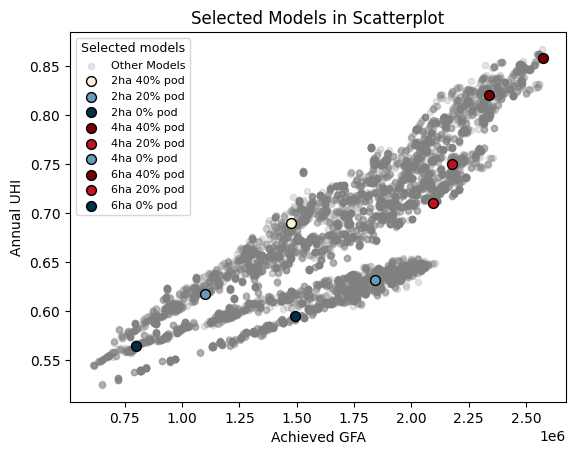

In [38]:
import matplotlib.pyplot as plt

# Scatterplot for all models
x1 = dataset3['total_GFA']
y1 = dataset3['UHI_yr']

plt.scatter(x1, y1, facecolors='grey', alpha=0.2, s=20, label='Other Models')

# Model data: (sim_no, color, label)
highlighted_models = [
    (8700, "#FDF0D5", '2ha 40% pod'),
    (3485, "#669BBC", '2ha 20% pod'),
    (7345, "#003049", '2ha 0% pod'),
    (4207, "#780000", '4ha 40% pod'),
    (3492, "#C1121F", '4ha 20% pod'),
    (7342, "#669BBC", '4ha 0% pod'),
    (4289, "#780000", '6ha 40% pod'),
    (8059, "#C1121F", '6ha 20% pod'),
    (7269, "#003049", '6ha 0% pod')
]

# Loop through each model to plot
for sim_no, color, label in highlighted_models:
    highlighted_model = dataset3.query(f'sim_no == {sim_no}')
    x = highlighted_model['total_GFA']
    y = highlighted_model['UHI_yr']
    plt.scatter(x, y, color=color, edgecolor='black', s=50, label=label, zorder=3)

# Chart customization
plt.xlabel('Achieved GFA')
plt.ylabel('Annual UHI')
plt.title('Selected Models in Scatterplot')
plt.legend(title='Selected models', fontsize='8', title_fontsize='9')  # Add a legend to differentiate the highlighted model
plt.grid(False)

plt.savefig('selected_models.png', bbox_inches='tight', dpi=300)
# Show the plot
plt.show()


## Plot the models highlighted above

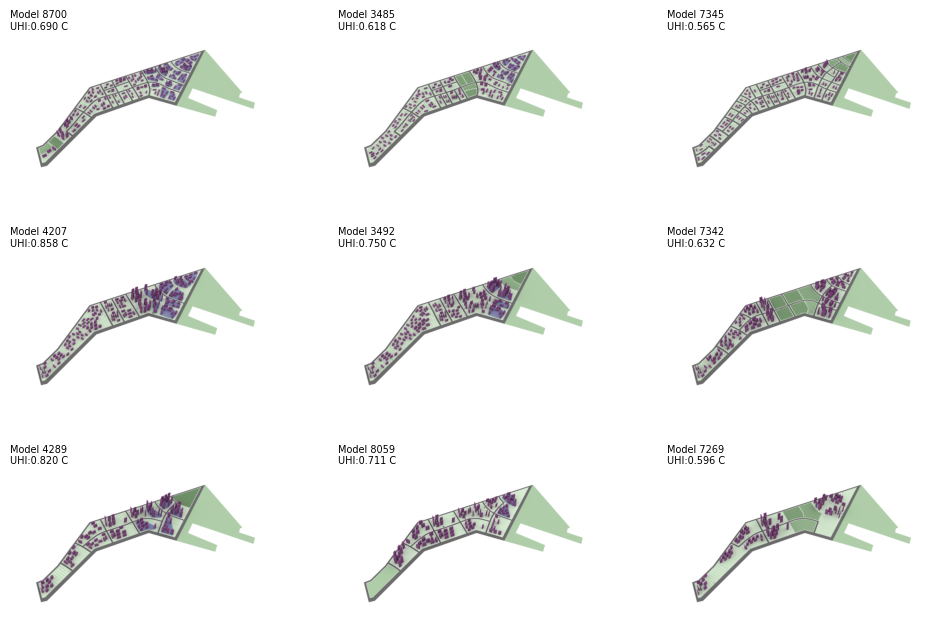

In [40]:
from PIL import Image
import matplotlib.pyplot as plt

# Define the image paths and labels
models = [
    {"sim_no": "8700", "path": r"2ha_8700.png", "label": "Model 8700\nUHI:0.690 C"},
    {"sim_no": "3485", "path": r"2ha_3485.png", "label": "Model 3485\nUHI:0.618 C"},
    {"sim_no": "7345", "path": r"2ha_7345.png", "label": "Model 7345\nUHI:0.565 C"},
    {"sim_no": "4207", "path": r"4ha_4207.png", "label": "Model 4207\nUHI:0.858 C"},
    {"sim_no": "3492", "path": r"4ha_3492.png", "label": "Model 3492\nUHI:0.750 C"},
    {"sim_no": "7342", "path": r"4ha_7342.png", "label": "Model 7342\nUHI:0.632 C"},
    {"sim_no": "4289", "path": r"6ha_4289.png", "label": "Model 4289\nUHI:0.820 C"},
    {"sim_no": "8059", "path": r"6ha_8059.png", "label": "Model 8059\nUHI:0.711 C"},
    {"sim_no": "7269", "path": r"6ha_7269.png", "label": "Model 7269\nUHI:0.596 C"}
]

# Create the figure and the grid layout for 3 rows and 3 columns
fig, ax = plt.subplot_mosaic(
    [["8700", "3485", "7345"],  # Row 1
     ["4207", "3492", "7342"],  # Row 2
     ["4289", "8059", "7269"]],  # Row 3
    figsize=(12, 8)
)

# Loop through each model and plot the image
for model in models:
    sim_no = model["sim_no"]
    img_path = model["path"]
    label = model["label"]
    
    # Read and display the image
    image = plt.imread(img_path, format="png")
    ax[sim_no].imshow(image)
    ax[sim_no].axis("off")
    
    # Add the label to the lower-left corner
    ax[sim_no].text(0, 0, label, fontsize=7, color='black', ha='left', va='bottom')

# Save and display the figure
#plt.savefig('multifacet_models.png', bbox_inches='tight', dpi=300)
plt.show()


________________________

# 3D scatterplot

### Test figure

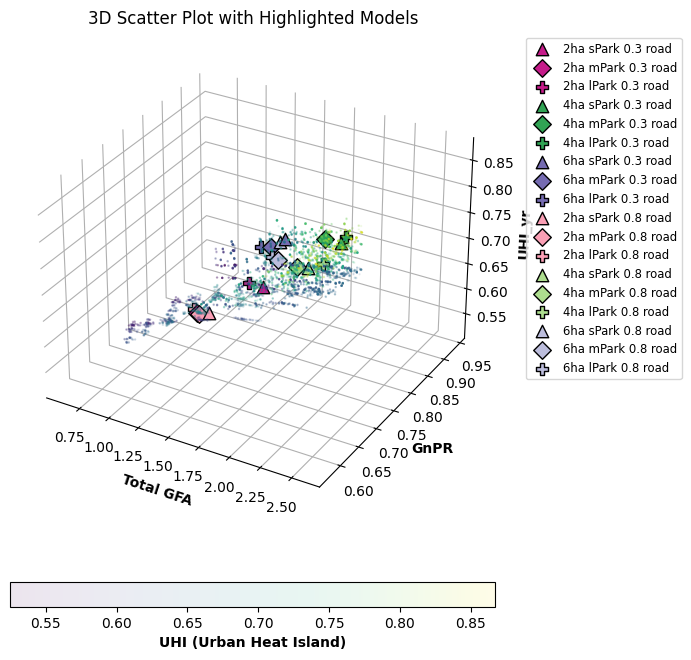

In [41]:
# Import libraries
from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt

# Creating dataset
z = dataset3['UHI_yr']
x = dataset3['total_GFA']
y = dataset3['GnPR']

# Creating figure
fig = plt.figure(figsize=(10, 7))
ax = plt.axes(projection="3d")

# Scatterplot for the main dataset
sctt = ax.scatter3D(x, y, z, alpha=0.1, c=z, marker='o', s=0.5)

# Highlighted models data

highlighted_models = [
    (3155, "#c51b8a", '2ha sPark 0.3 road', '^'),
    (3285, "#c51b8a", '2ha mPark 0.3 road', 'D'),
    (3215, "#c51b8a", '2ha lPark 0.3 road', 'P'),
    (3157, "#31a354", '4ha sPark 0.3 road', '^'),
    (3187, "#31a354", '4ha mPark 0.3 road', 'D'),
    (3217, "#31a354", '4ha lPark 0.3 road', 'P'),
    (3159, "#756bb1", '6ha sPark 0.3 road', '^'),
    (3189, "#756bb1", '6ha mPark 0.3 road', 'D'),
    (3219, "#756bb1", '6ha lPark 0.3 road', 'P'),
    (3230, "#fa9fb5", '2ha sPark 0.8 road', '^'),
    (3260, "#fa9fb5", '2ha mPark 0.8 road', 'D'),
    (3290, "#fa9fb5", '2ha lPark 0.8 road', 'P'),
    (3232, "#addd8e", '4ha sPark 0.8 road', '^'),
    (3268, "#addd8e", '4ha mPark 0.8 road', 'D'),
    (3292, "#addd8e", '4ha lPark 0.8 road', 'P'),
    (3224, "#bcbddc", '6ha sPark 0.8 road', '^'),
    (3264, "#bcbddc", '6ha mPark 0.8 road', 'D'),
    (3294, "#bcbddc", '6ha lPark 0.8 road', 'P')
]

# Loop through highlighted models and add them to the plot
for sim_no, color, label, marker in highlighted_models:
    model = dataset3.query(f'sim_no == {sim_no}')
    x_h = model['total_GFA']
    y_h = model['GnPR']
    z_h = model['UHI_yr']
    ax.scatter3D(x_h, y_h, z_h, color=color, edgecolor='black', s=80, label=label, marker = marker)

# Adding labels, title, and colorbar
ax.set_xlabel('Total GFA', fontweight='bold')
ax.set_ylabel('GnPR', fontweight='bold')
ax.set_zlabel('UHI_yr', fontweight='bold')
plt.title("3D Scatter Plot with Highlighted Models")
#fig.colorbar(sctt, ax=ax, shrink=0.5, aspect=10)

# Adding legend
ax.legend(loc='upper left', bbox_to_anchor=(1.05, 1), fontsize='small')


# Adjust colorbar to be horizontal and below the plot
cbar = fig.colorbar(sctt, ax=ax, orientation='horizontal', shrink=0.5, pad=0.1)
cbar.set_label('UHI (Urban Heat Island)', fontweight='bold')

# Modify axis plane theme to white
ax.xaxis.set_pane_color((1.0, 1.0, 1.0, 1.0))  # White background for X-Y plane
ax.yaxis.set_pane_color((1.0, 1.0, 1.0, 1.0))  # White background for Y-Z plane
ax.zaxis.set_pane_color((1.0, 1.0, 1.0, 1.0))  # White background for Z-X plane
ax.grid(color='gray', linestyle='--', linewidth=0.5)  # Grid with dashed lines and light gray color


fig.patch.set_facecolor('white')
# Show plot
plt.tight_layout()
plt.show()


- edit the angle of visualization

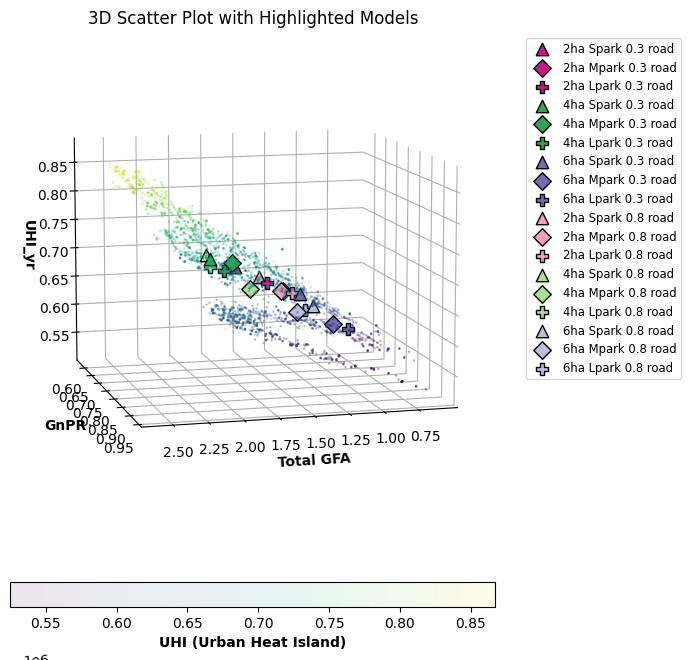

In [ ]:
# Import libraries
from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt

# Creating dataset
z = dataset3['UHI_yr']
x = dataset3['total_GFA']
y = dataset3['GnPR']

# Creating figure
fig = plt.figure(figsize=(10, 7))
ax = plt.axes(projection="3d")

# Scatterplot for the main dataset
sctt = ax.scatter3D(x, y, z, alpha=0.1, c=z, marker='o', s=0.5)

# Highlighted models data

highlighted_models = [
    (3155, "#c51b8a", '2ha Spark 0.3 road', '^'),
    (3285, "#c51b8a", '2ha Mpark 0.3 road', 'D'),
    (3215, "#c51b8a", '2ha Lpark 0.3 road', 'P'),
    (3157, "#31a354", '4ha Spark 0.3 road', '^'),
    (3187, "#31a354", '4ha Mpark 0.3 road', 'D'),
    (3217, "#31a354", '4ha Lpark 0.3 road', 'P'),
    (3159, "#756bb1", '6ha Spark 0.3 road', '^'),
    (3189, "#756bb1", '6ha Mpark 0.3 road', 'D'),
    (3219, "#756bb1", '6ha Lpark 0.3 road', 'P'),
    (3230, "#fa9fb5", '2ha Spark 0.8 road', '^'),
    (3260, "#fa9fb5", '2ha Mpark 0.8 road', 'D'),
    (3290, "#fa9fb5", '2ha Lpark 0.8 road', 'P'),
    (3232, "#addd8e", '4ha Spark 0.8 road', '^'),
    (3268, "#addd8e", '4ha Mpark 0.8 road', 'D'),
    (3292, "#addd8e", '4ha Lpark 0.8 road', 'P'),
    (3224, "#bcbddc", '6ha Spark 0.8 road', '^'),
    (3264, "#bcbddc", '6ha Mpark 0.8 road', 'D'),
    (3294, "#bcbddc", '6ha Lpark 0.8 road', 'P')
]

# Loop through highlighted models and add them to the plot
for sim_no, color, label, marker in highlighted_models:
    model = dataset3.query(f'sim_no == {sim_no}')
    x_h = model['total_GFA']
    y_h = model['GnPR']
    z_h = model['UHI_yr']
    ax.scatter3D(x_h, y_h, z_h, color=color, edgecolor='black', s=80, label=label, marker = marker)

# Adding labels, title, and colorbar
ax.set_xlabel('Total GFA', fontweight='bold')
ax.set_ylabel('GnPR', fontweight='bold')
ax.set_zlabel('UHI_yr', fontweight='bold')
plt.title("3D Scatter Plot with Highlighted Models")
#fig.colorbar(sctt, ax=ax, shrink=0.5, aspect=10)

# Adding legend
ax.legend(loc='upper left', bbox_to_anchor=(1.05, 1), fontsize='small')


# Adjust colorbar to be horizontal and below the plot
cbar = fig.colorbar(sctt, ax=ax, orientation='horizontal', shrink=0.5, pad=0.1)
cbar.set_label('UHI (Urban Heat Island)', fontweight='bold')

# Modify axis plane theme to white
ax.xaxis.set_pane_color((1.0, 1.0, 1.0, 1.0))  # White background for X-Y plane
ax.yaxis.set_pane_color((1.0, 1.0, 1.0, 1.0))  # White background for Y-Z plane
ax.zaxis.set_pane_color((1.0, 1.0, 1.0, 1.0))  # White background for Z-X plane
ax.grid(color='gray', linestyle='--', linewidth=0.5)  # Grid with dashed lines and light gray color


#ax.view_init(-120, 30,)
ax.azim = 75
ax.elev = 10

fig.patch.set_facecolor('white')
# Show plot
plt.tight_layout()

#plt.savefig('3Dscatterplot_ind.png', bbox_inches='tight', dpi=300)
plt.show()


In [43]:
# Define the highlighted models list
highlighted_models = [
    (3155, "#c51b8a", '2ha sPark 0.3 road', '^'),
    (3285, "#c51b8a", '2ha mPark 0.3 road', 'D'),
    (3215, "#c51b8a", '2ha lPark 0.3 road', 'P'),
    (3157, "#31a354", '4ha sPark 0.3 road', '^'),
    (3187, "#31a354", '4ha mPark 0.3 road', 'D'),
    (3217, "#31a354", '4ha lPark 0.3 road', 'P'),
    (3159, "#756bb1", '6ha sPark 0.3 road', '^'),
    (3189, "#756bb1", '6ha mPark 0.3 road', 'D'),
    (3219, "#756bb1", '6ha lPark 0.3 road', 'P'),
    (3230, "#fa9fb5", '2ha sPark 0.8 road', '^'),
    (3260, "#fa9fb5", '2ha mPark 0.8 road', 'D'),
    (3290, "#fa9fb5", '2ha lPark 0.8 road', 'P'),
    (3232, "#addd8e", '4ha sPark 0.8 road', '^'),
    (3268, "#addd8e", '4ha mPark 0.8 road', 'D'),
    (3292, "#addd8e", '4ha lPark 0.8 road', 'P'),
    (3224, "#bcbddc", '6ha sPark 0.8 road', '^'),
    (3264, "#bcbddc", '6ha mPark 0.8 road', 'D'),
    (3294, "#bcbddc", '6ha lPark 0.8 road', 'P')
]

# Loop through each model, query the dataset, and print the UHI_yr value
for sim_no, color, description, marker in highlighted_models:
    model = dataset3.query(f'sim_no == {sim_no}').sort_values('UHI_yr', ascending=True)
    if not model.empty:
        print(f"Model: {description} (sim_no: {sim_no})")
        print(model[['UHI_yr']])
        print(model[['total_GFA']])
        print(model[['GnPR']])
        print()
    else:
        print(f"No data found for Model: {description} (sim_no: {sim_no})\n")



Model: 2ha sPark 0.3 road (sim_no: 3155)
        UHI_yr
3155  0.691826
      total_GFA
3155  1729400.0
          GnPR
3155  0.718614

Model: 2ha mPark 0.3 road (sim_no: 3285)
        UHI_yr
3285  0.637705
      total_GFA
3285  1307700.0
          GnPR
3285  0.679143

Model: 2ha lPark 0.3 road (sim_no: 3215)
        UHI_yr
3215  0.668836
      total_GFA
3215  1527000.0
          GnPR
3215  0.746526

Model: 4ha sPark 0.3 road (sim_no: 3157)
        UHI_yr
3157  0.731495
      total_GFA
3157  2052500.0
          GnPR
3157  0.825305

Model: 4ha mPark 0.3 road (sim_no: 3187)
        UHI_yr
3187  0.724783
      total_GFA
3187  1903200.0
          GnPR
3187  0.831929

Model: 4ha lPark 0.3 road (sim_no: 3217)
        UHI_yr
3217  0.718733
      total_GFA
3217  2000300.0
          GnPR
3217  0.858663

Model: 6ha sPark 0.3 road (sim_no: 3159)
        UHI_yr
3159  0.675548
      total_GFA
3159  1461600.0
          GnPR
3159  0.866231

Model: 6ha mPark 0.3 road (sim_no: 3189)
      UHI_yr
3189  0.

## combine 4 plots:
- 3D scatterplot
- X-Y projection
- Y-Z projection
- X-Z projection

C:\Users\prave\AppData\Local\Temp\ipykernel_83196\2842199612.py:97: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()
C:\Users\prave\AppData\Local\Temp\ipykernel_83196\2842199612.py:97: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  plt.tight_layout()


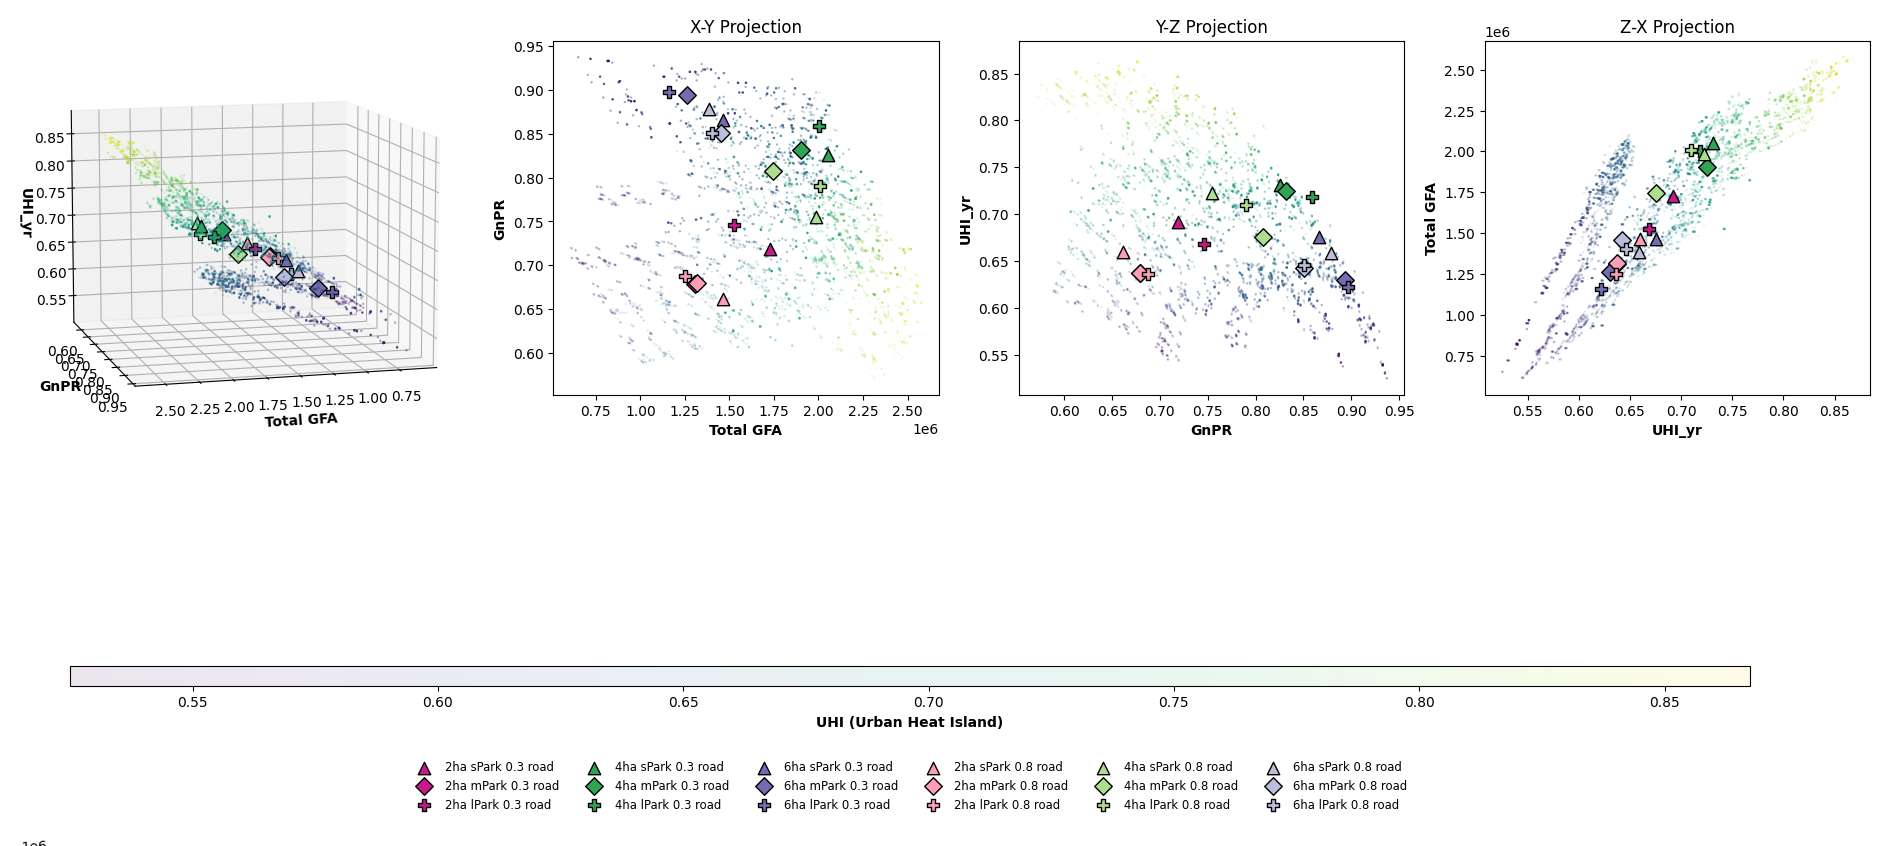

In [ ]:
from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

# Create dataset
z = dataset3['UHI_yr']
x = dataset3['total_GFA']
y = dataset3['GnPR']

# Function to scale 3D Z-axis and 2D Y-axis heights
def plot_scaled_3d_and_2d_with_four_plots(scale_to_match_3dz_with_2dy=True, twod_bottom_bound=None, twod_top_bound=None):
    fig = plt.figure(figsize=(24, 10))
    gs = gridspec.GridSpec(100, 120)

    # Adjust 2D subplot bounds for alignment
    if scale_to_match_3dz_with_2dy and twod_bottom_bound is None:
        twod_bottom_bound = 30
    elif twod_bottom_bound is None:
        twod_bottom_bound = 18

    if scale_to_match_3dz_with_2dy and twod_top_bound is None:
        twod_top_bound = 76
    elif twod_top_bound is None:
        twod_top_bound = 87

    # Add 3D scatter plot
    ax_3d = fig.add_subplot(gs[:100, :30], projection='3d')
    sctt = ax_3d.scatter3D(x, y, z, alpha=0.1, c=z, marker='o', s=0.5)

    # Highlight models in 3D scatter
    for sim_no, color, label, marker in highlighted_models:
        model = dataset3.query(f'sim_no == {sim_no}')
        ax_3d.scatter3D(
            model['total_GFA'], model['GnPR'], model['UHI_yr'],
            color=color, edgecolor='black', s=80, label=label, marker=marker
        )

    # Adjust 3D plot view
    ax_3d.azim = 75
    ax_3d.elev = 10
    ax_3d.set_xlabel('Total GFA', fontweight='bold')
    ax_3d.set_ylabel('GnPR', fontweight='bold')
    ax_3d.set_zlabel('UHI_yr', fontweight='bold')

    x_offset = 5

    # Add 2D scatter (X-Y projection)
    ax_xy = fig.add_subplot(gs[100 - twod_top_bound:100 - twod_bottom_bound, 30+x_offset:60])
    ax_xy.scatter(x, y, alpha=0.1, c=z, s=0.5)
    for sim_no, color, label, marker in highlighted_models:
        model = dataset3.query(f'sim_no == {sim_no}')
        ax_xy.scatter(
            model['total_GFA'], model['GnPR'],
            color=color, edgecolor='black', s=80, marker=marker
        )
    ax_xy.set_xlabel('Total GFA', fontweight='bold')
    ax_xy.set_ylabel('GnPR', fontweight='bold')
    ax_xy.set_title('X-Y Projection')

    # Add 2D scatter (Y-Z projection)
    ax_yz = fig.add_subplot(gs[100 - twod_top_bound:100 - twod_bottom_bound, 60+x_offset:90])
    ax_yz.scatter(y, z, alpha=0.1, c=z, s=0.5)
    for sim_no, color, label, marker in highlighted_models:
        model = dataset3.query(f'sim_no == {sim_no}')
        ax_yz.scatter(
            model['GnPR'], model['UHI_yr'],
            color=color, edgecolor='black', s=80, marker=marker
        )
    ax_yz.set_xlabel('GnPR', fontweight='bold')
    ax_yz.set_ylabel('UHI_yr', fontweight='bold')
    ax_yz.set_title('Y-Z Projection')

    # Add 2D scatter (Z-X projection)
    ax_zx = fig.add_subplot(gs[100 - twod_top_bound:100 - twod_bottom_bound, 90+x_offset:])
    ax_zx.scatter(z, x, alpha=0.1, c=z, s=0.5)
    for sim_no, color, label, marker in highlighted_models:
        model = dataset3.query(f'sim_no == {sim_no}')
        ax_zx.scatter(
            model['UHI_yr'], model['total_GFA'],
            color=color, edgecolor='black', s=80, marker=marker
        )
    ax_zx.set_xlabel('UHI_yr', fontweight='bold')
    ax_zx.set_ylabel('Total GFA', fontweight='bold')
    ax_zx.set_title('Z-X Projection')

    # Shared Colorbar
    cbar_ax = fig.add_axes([0.15, 0.05, 0.7, 0.02])
    cbar = fig.colorbar(sctt, cax=cbar_ax, orientation='horizontal')
    cbar.set_label('UHI (Urban Heat Island)', fontweight='bold')

    # Shared Legend for Highlighted Models
    handles, labels = ax_3d.get_legend_handles_labels()
    legend_ax = fig.add_axes([0.15, -0.1, 0.7, 0.1])
    legend_ax.axis('off')
    legend_ax.legend(handles, labels, loc='center', fontsize='small', ncol=6, frameon=False)

    plt.tight_layout()
    # Save and display the figure
    #plt.savefig('3Dscatterplot_v0.png', bbox_inches='tight', dpi=300)
    plt.show()
    
    

# Call function to plot
plot_scaled_3d_and_2d_with_four_plots()

